### Load packages

In [1]:
import os
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')

In [2]:
##Import packages

import anndata as ad
import scimap as sm
import importlib
import re

import scanpy as sp
import pandas as pd
import numpy as np
import napari as napari
import math
import seaborn as sns
import itertools
import umap as um

from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, leaves_list
from scipy.spatial.distance import pdist
from matplotlib.colors import Normalize

import hetmel as hm

Running SCIMAP  2.2.11


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [28]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

### Set up files, directories, variables

Set and go to project directory 

In [4]:
project_dir = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/"
case_number = "Case3-7"
print(case_number)
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
savedir= "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/"

Case3-7


Variables 

In [ ]:
phenotype = pd.read_csv('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/20250408_phenotyping_workflow_allcombinations.csv')
image_path="/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/Case3-7/background/Case3-7_final.ome.tif"
feature_table_path = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case4-2/Case4-2_feature-extraction.csv"

### Read in data

In [ ]:
adata = ad.read_h5ad('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case3-7/Case3-7_tumor_adata_v2.h5ad')

### Write data

In [ ]:
#write adata to a file
case_number='Case1-38'
Case1_tumor_adata_subset.write(project_dir + case_number + '/' + case_number +'_tumor_adata_subset_cluster.h5ad')

Set marker subset variables 

In [107]:
#Marker subsets

AP1s = ['cFOS', 'FRA1','FRA2','cJUN','JUNB','JUND']
Diff_state_markers = ['MITF','SOX10','PRAME','SOX9','NGFR','AXL']

Create layers to save log raw data and zscore of the log raw data

In [ ]:
adata


AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log'

In [ ]:

adata.layers["log1p_raw"] = np.log1p(adata.raw.X) #log layer
adata.layers["zscore"] = stats.zscore(adata.layers["log1p_raw"], axis = 0) #z score log layer
adata

AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'zscore'

## Read in all 4 tumor_adata

In [5]:
Case1_tumor_adata = ad.read_h5ad(project_dir +"/Case1-38/Case1-38tumoradata_v3_AP1gated.h5ad")
Case2_tumor_adata = ad.read_h5ad(project_dir +"/Case2-7/Case2-7tumoradata_v3_AP1gated.h5ad")
Case3_tumor_adata = ad.read_h5ad(project_dir +"/Case3-7/Case3-7tumor_v4_AP1gated.h5ad")
Case4_tumor_adata = ad.read_h5ad(project_dir +"/Case4-2/Case4-2tumor_v5_AP1gated.h5ad")

Z-score raw intensity based on tumor adata subset, instead of literally all the cells. Save new z-score as tumor_zscore in adata.obs

Subset tumor adata further to exclude phenotypes that are below a certain threshold of prevalence

In [6]:
Case1_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case1_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case2_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case2_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case3_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case3_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case4_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case4_tumor_adata, threshold=0.01, verbose=False, return_adata=True)

In [7]:
tumor_adata_list = [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset]
# Compute z-scores and assign them to a new layer
for i in tumor_adata_list:
    i.layers["log1p_raw"] = np.log1p(i.raw.X) #log layer
    i.layers['tumor_zscore'] = stats.zscore(i.layers["log1p_raw"], axis=0
)

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_37959/2656969478.py:4: ImplicitModificationWarning:

Setting element `.layers['log1p_raw']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_37959/2656969478.py:4: ImplicitModificationWarning:

Setting element `.layers['log1p_raw']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_37959/2656969478.py:4: ImplicitModificationWarning:

Setting element `.layers['log1p_raw']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_37959/2656969478.py:4: ImplicitModificationWarning:

Setting element `.layers['log1p_raw']` of view, initializing view as actual.



## Normalizing marker intensity values to background gate

In [447]:
gates = Case2_tumor_adata_subset.uns['gates']
gates_vector = np.array([gates.get(marker, 0) for marker in Case2_tumor_adata_subset.var_names])


In [454]:
gate_vector = np.array([gates_dict.get(marker, 0) for marker in Case2_tumor_adata_subset.var_names])


In [456]:
gates_dict

{'AXL': 4.81,
 'CD4': 3.1902314095999422,
 'CD45': 3.55,
 'FAP': 5.3,
 'FRA1': 4.25163846237471,
 'FRA2': 3.5582607711940106,
 'Hoechst': 6.782180161428971,
 'JUNB': 4.930968764010679,
 'JUND': 2.875924220037207,
 'Ki67': 3.51120483341567,
 'MITF': 3.3,
 'NGFR': 5.5,
 'PRAME': 3.66,
 'SOX10': 4.44,
 'SOX9': 4.2,
 'cFOS': 4.177516070854074,
 'cJUN': 3.6414434667169466}

In [455]:
gate_vector

array([6.78218016, 3.66      , 3.3       , 2.87592422, 4.44      ,
       3.64144347, 4.17751607, 5.5       , 3.51120483, 4.81      ,
       3.55      , 5.3       , 4.25163846, 4.2       , 3.55826077,
       3.19023141, 4.93096876])

In [8]:
def normalize_to_gates(adata):
    gates = adata.uns['gates']
    # Select the 2nd column by position, not by name
    feature_cols = [col for col in gates.columns if re.search("feature", col, re.IGNORECASE)]
    if not feature_cols:
        raise ValueError("No column containing 'feature' found in gates DataFrame.")
    gates_series = gates[feature_cols[0]]
    gates_dict = gates_series.to_dict()
    var_names = list(adata.var_names)
    gate_vector = np.array([gates_dict.get(marker, 0) for marker in var_names])
    
    # Verbose output: print the gate value for each marker
    print("Subtracting the following gate values from each marker:")
    for marker, gate_val in zip(var_names, gate_vector):
        print(f"  {marker}: {gate_val}")
    
    adata.layers["log_background_normalized"] = (adata.layers["log1p_raw"] - gate_vector)
    print("Background normalization complete. Layer 'log_background_normalized' added.")
    

In [17]:
print(gates.columns)
print(gates.shape)

NameError: name 'gates' is not defined

In [472]:
Case2_tumor_adata_subset.uns['gates']

,Case2-7_feature-extraction
markers,
AXL,4.810000
CD4,3.190231
CD45,3.550000
FAP,5.300000
FRA1,4.251638
FRA2,3.558261
Hoechst,6.782180
JUNB,4.930969
JUND,2.875924


In [9]:
for i in tumor_adata_list:
    normalize_to_gates(i)

Subtracting the following gate values from each marker:
  Hoechst: 8.04125074785126
  PRAME: 4.55
  MITF: 5.2
  JUND: 3.3
  SOX10: 5.3
  cJUN: 2.75
  cFOS: 2.5
  NGFR: 6.3
  Ki67: 3.705155255078167
  AXL: 5.5
  CD45: 5.0
  FAP: 5.45
  FRA1: 3.42
  SOX9: 5.8
  FRA2: 3.15
  CD4: 3.508380904859882
  JUNB: 2.6
Background normalization complete. Layer 'log_background_normalized' added.
Subtracting the following gate values from each marker:
  Hoechst: 6.782180161428971
  PRAME: 3.66
  MITF: 3.3
  JUND: 2.7
  SOX10: 4.44
  cJUN: 2.7
  cFOS: 2.7
  NGFR: 5.5
  Ki67: 3.51120483341567
  AXL: 4.81
  CD45: 3.55
  FAP: 5.3
  FRA1: 3.1
  SOX9: 4.2
  FRA2: 2.8
  CD4: 3.1902314095999422
  JUNB: 3.1
Background normalization complete. Layer 'log_background_normalized' added.
Subtracting the following gate values from each marker:
  Hoechst: 5.0
  PRAME: 2.8
  MITF: 2.3
  JUND: 2.9
  SOX10: 2.8
  cJUN: 2.1
  cFOS: 2.5
  NGFR: 4.6
  Ki67: 3.4
  AXL: 4.39
  CD45: 3.8
  FAP: 3.7
  FRA1: 2.6
  SOX9: 4.6
  FR

In [457]:
Case2_tumor_adata_subset.layers["log_background_normalized"] = (
    Case2_tumor_adata_subset.layers["log1p_raw"] - gate_vector
)

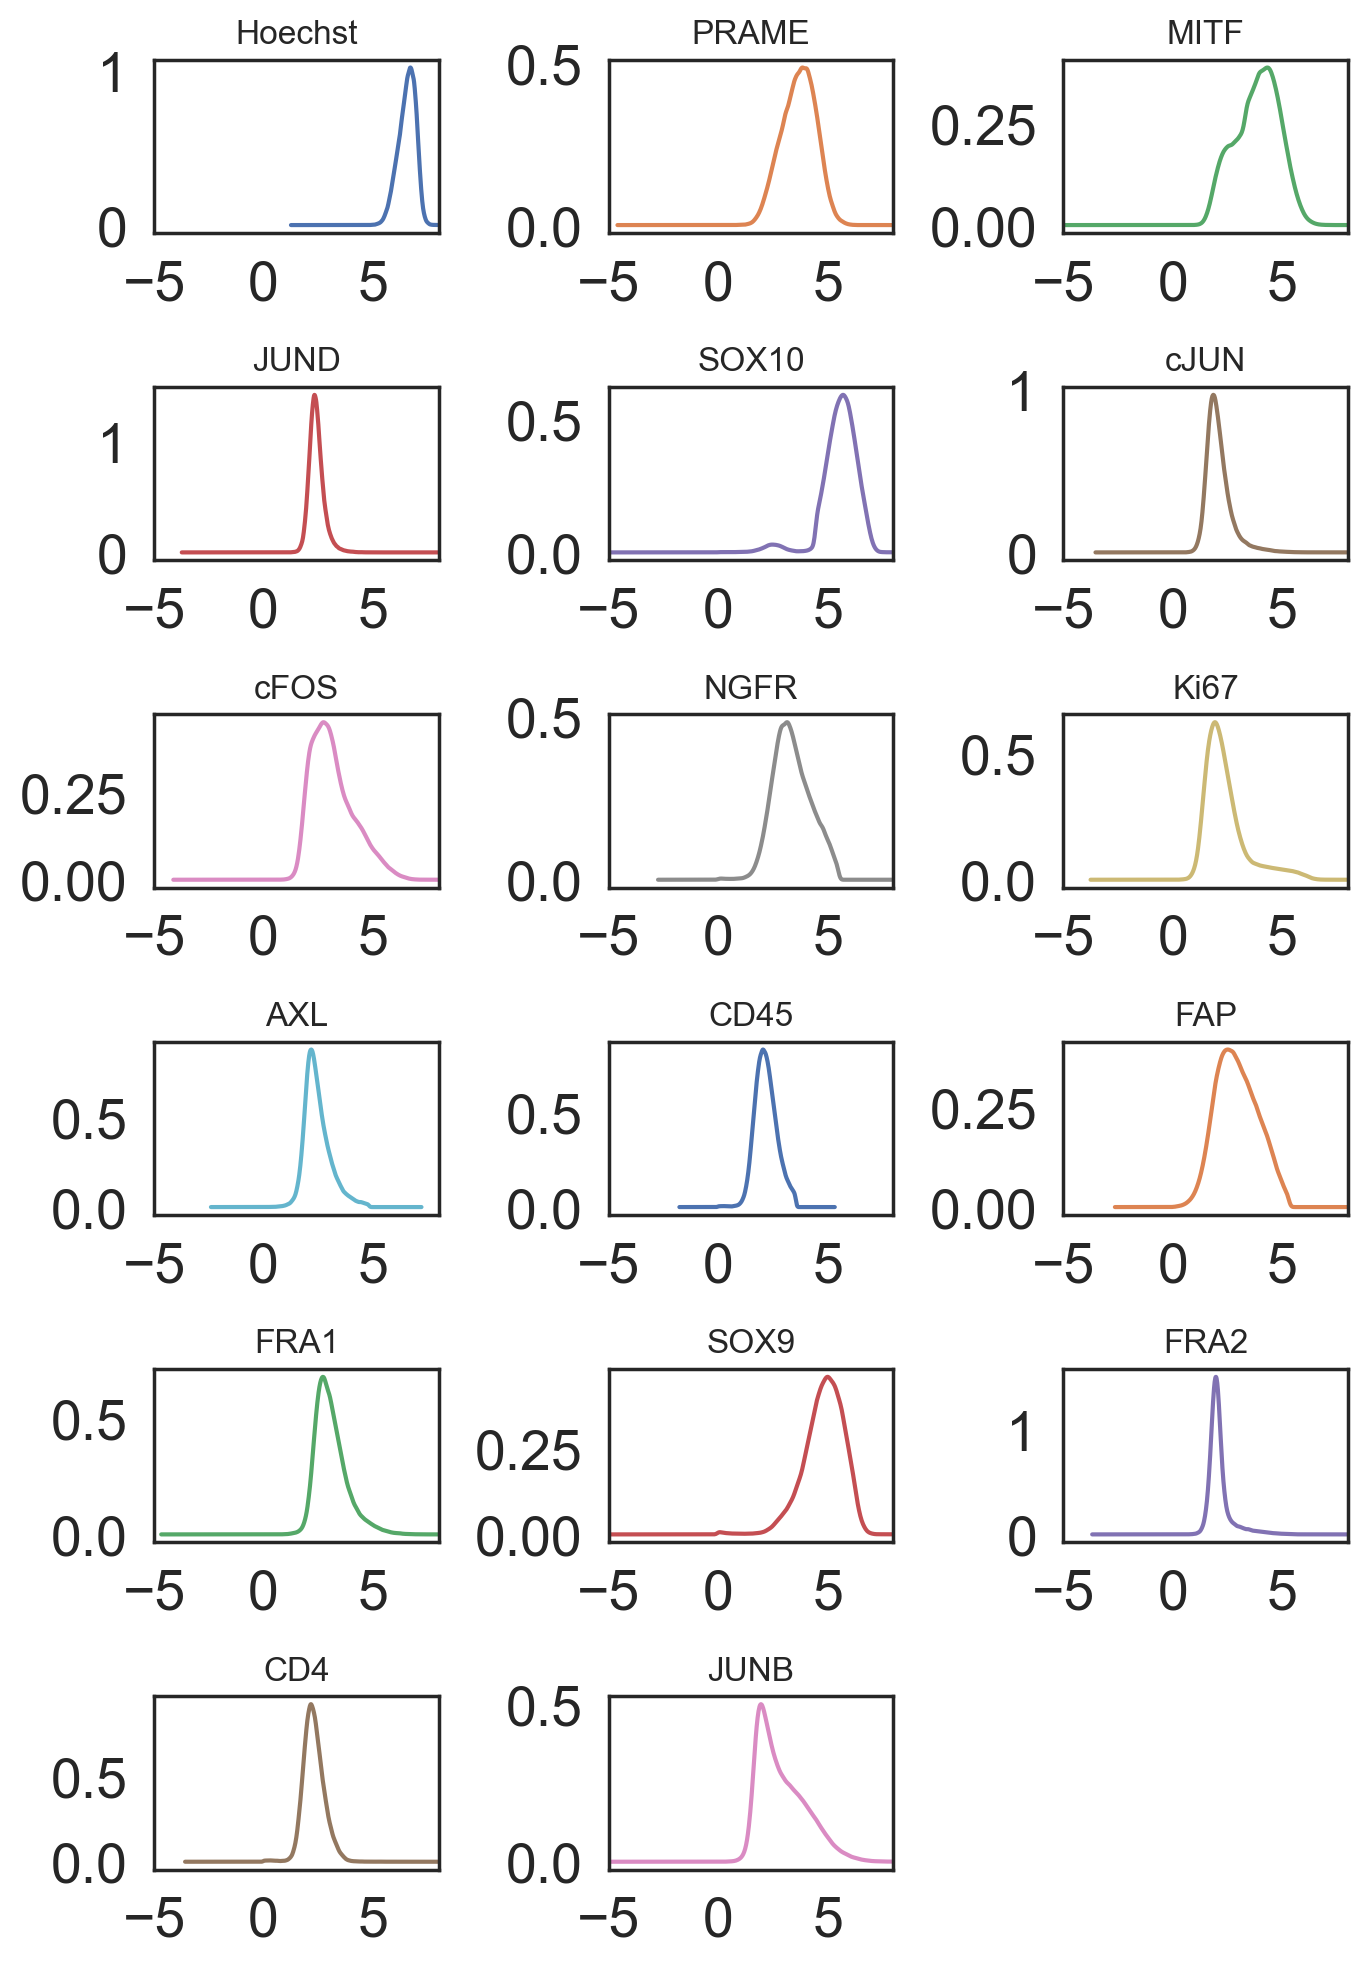

In [466]:
hm.distPlot(Case2_tumor_adata_subset, layer='log1p_raw',figsize=(7,10),ncols=3, fontsize=20,scale_x1=-5, scale_x2=8)

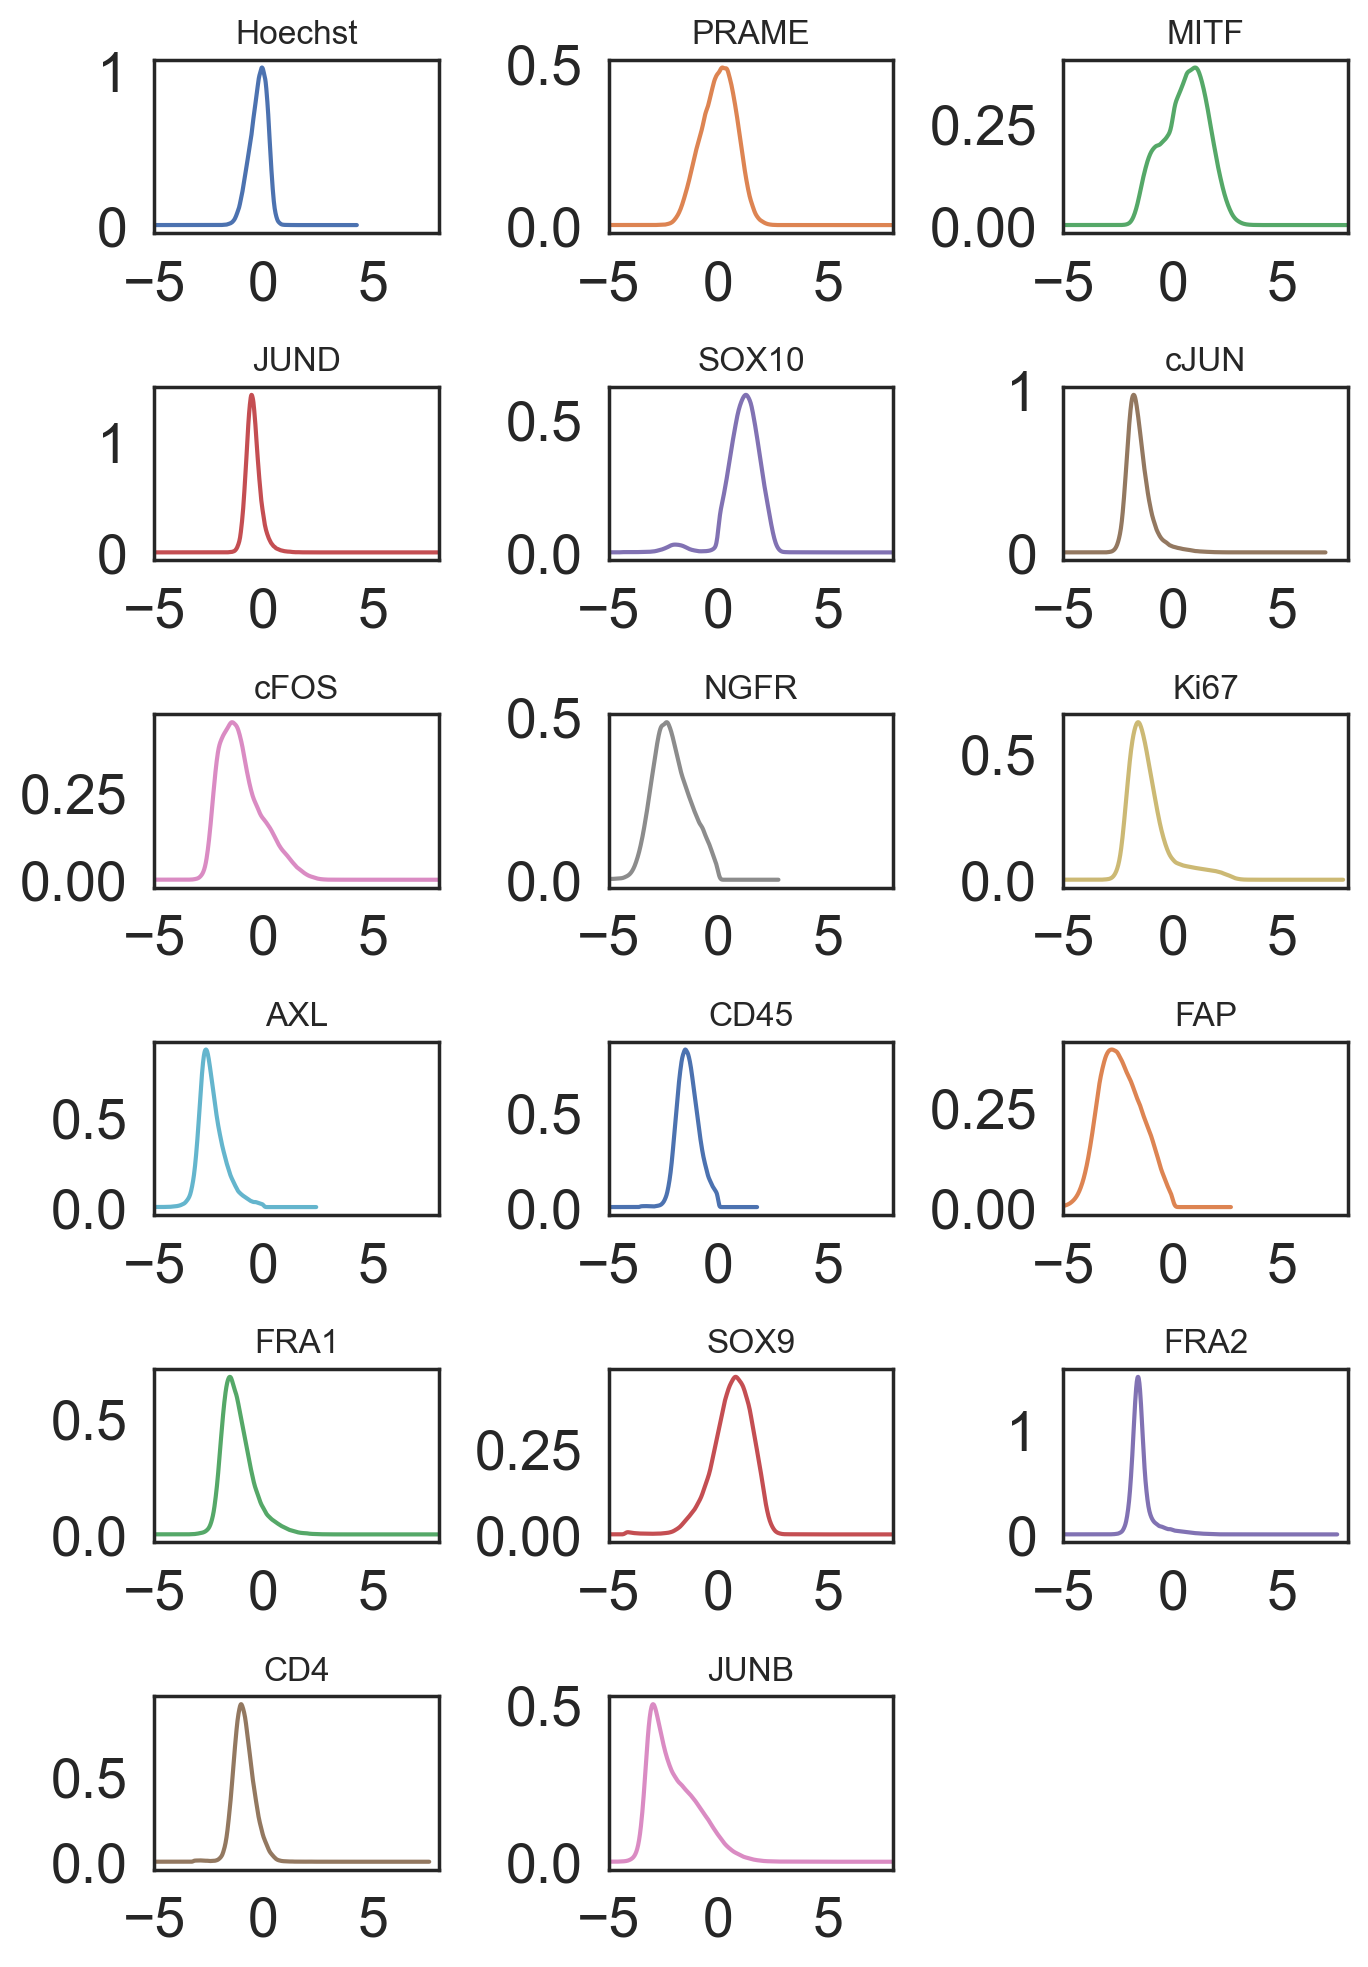

In [473]:
hm.distPlot(Case2_tumor_adata_subset, layer='log_background_normalized',figsize=(7,10),ncols=3, fontsize=20,scale_x1=-5, scale_x2=8)

In [458]:
Case2_tumor_adata_subset.layers["log_background_normalized"]

array([[ 0.1659636 ,  0.26684926,  0.09484815, ..., -0.30749385,
        -0.47881137, -0.70441224],
       [-0.60905014, -1.96881144, -1.45710157, ..., -1.1126983 ,
        -1.74986983, -1.85263296],
       [-0.45837277, -2.161064  , -1.16083922, ...,  0.21750185,
        -1.52107426,  1.84618708],
       ...,
       [-0.13668615, -0.57671483,  0.53729946, ..., -2.02139355,
        -2.1786305 , -3.43358036],
       [-0.01807973, -0.51297828,  0.70830241, ..., -2.05270299,
        -3.03038271, -2.46967198],
       [ 0.25538807,  1.17069551,  0.68237393, ..., -0.9069166 ,
        -0.11816151, -1.79047037]])

Matrices of phenotype data from tumor_adata_subsets

In [65]:
#1 = MITF; 2 = SOX10; 3 = PRAME; 4 = NGFR; 5 = SOX9; 6 = AXL

Case3_matrix = np.array([
    [1, 2, 3, 4, 5, 0],
    [1, 2, 3, 0, 5, 0],
    [1, 2, 3, 4, 0, 0],
    [1, 2, 3, 0, 0, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 3, 0, 0, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 0, 3, 4, 0, 0],
    [1, 2, 0, 4, 0, 0],
    [1, 0, 0, 4, 0, 0],
    [1, 0, 3, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [1, 2, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0]
])

Case1_matrix = np.array([
    [1, 2, 0, 4, 5, 0],
    [1, 2, 3, 4, 5, 0],
    [1, 2, 3, 0, 5, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 2, 0, 0, 0, 0],
    [1, 0, 0, 0, 5, 0],
    [0, 2, 0, 4, 5, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 3, 0, 5, 0]
])

Case2_matrix = np.array([
    [1, 0, 0, 0, 0, 0],
    [1, 2, 3, 0, 5, 0],
    [0, 2, 3, 0, 5, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 2, 3, 0, 0, 0],
    [1, 2, 0, 0, 0, 0]
])

Case4_matrix = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 4, 0, 0],
    [0, 2, 0, 0, 0, 0],
    [0, 2, 3, 4, 5, 0],
    [0, 2, 0, 4, 5, 0],
    [0, 2, 3, 4, 5, 6],
    [0, 2, 0, 4, 5, 6]
])

Generate arrays containing only unique rows and only duplicate rows

In [66]:
# Join all arrays and remove duplicate rows

all_matrices = np.vstack([
    Case1_matrix,
    Case2_matrix,
    Case3_matrix,
    Case4_matrix
])

# Find duplicate rows
_, unique_indices = np.unique(all_matrices, axis=0, return_index=True)
all_indices = np.arange(all_matrices.shape[0])
duplicate_indices = np.setdiff1d(all_indices, unique_indices)
duplicate_matrix = all_matrices[duplicate_indices]

# Remove duplicate rows
# np.unique with axis=0 returns unique rows
unique_matrix = np.unique(all_matrices, axis=0)

print("Unique rows shape:",unique_matrix.shape)
unique_matrix_binary = (unique_matrix > 0).astype(int)
duplicate_matrix_binary = (duplicate_matrix > 0).astype(int)
print("Duplicate rows shape:", duplicate_matrix.shape)



Unique rows shape: (23, 6)
Duplicate rows shape: (19, 6)


In [67]:
print(unique_matrix_binary)

[[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 1 0]
 [0 1 0 1 0 0]
 [0 1 0 1 1 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 1 0 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 1 0]
 [1 0 0 1 0 0]
 [1 0 1 0 0 0]
 [1 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 1 0]
 [1 1 0 1 0 0]
 [1 1 0 1 1 0]
 [1 1 1 0 0 0]
 [1 1 1 0 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 1 0]]


In [18]:
print(duplicate_matrix_binary)

[[1 0 0 0 0 0]
 [1 1 1 0 1 0]
 [0 1 1 0 1 0]
 [1 1 0 0 1 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 1 1 1 0]
 [1 1 1 0 1 0]
 [1 1 1 0 0 0]
 [1 1 0 0 1 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 0]
 [0 1 0 1 1 0]]


## Hierarchical Clustering

Run hierarchical clustering on unique matrix. Save linkage variable and row order

In [71]:
row_linkage = linkage(unique_matrix_binary, method='complete', metric='euclidean')
row_order = leaves_list(row_linkage)
unique_matrix_binary_ordered = unique_matrix_binary[row_order]



In [ ]:
if showPrevalence:
            # Calculate text offset from the last column of the heatmap
            text_offset = (
                mean_data.shape[1] * 0.001
            )  # Small offset from the right edge of the heatmap
            total_cells = sum(category_counts)

            for index, count in enumerate(category_counts):
                percentage = (count / total_cells) * 100
                # Position text immediately to the right of the heatmap
                ax.text(
                    mean_data.shape[1] + text_offset,
                    index,
                    f"n={count} ({percentage:.1f}%)",
                    va='center',
                    ha='left',
                )

In [ ]:

def plot_dend_with_grid(matrix, method = 'complete', dend_threshold=None, colors= None, figsize=(10, 6), marker_names=None,
                        fileName='dendrogram_with_grid.png', saveDir=None, return_clusters=False, label_clusters = True):
    fig = plt.figure(figsize=figsize)
    spec = plt.GridSpec(nrows=2, ncols=2, 
                    width_ratios=[1,0.5,],    
                    wspace=0.05,
                    figure=fig)

    ax_row_dendro = fig.add_subplot(spec[1, 0])
    
    if marker_names is None:
        Raise ValueError("marker_names must be provided to label the phenotype columns.")
    row_linkage = linkage(matrix, method=method, metric='euclidean')
    row_order = leaves_list(row_linkage)
    matrix_ordered = matrix[row_order]
    if dend_threshold is not None:
        dendrogram(row_linkage, orientation='left', ax=ax_row_dendro, color_threshold=dend_threshold)
    else:
        dendrogram(row_linkage, orientation='left', ax=ax_row_dendro)
   
    ax_row_dendro.set_xticks([])
    ax_row_dendro.set_yticks([])
    
    
    
    if colors == None: 
        colors=['white','black', 'black','black','black','black','black']
    else:
        colors = colors
        
    bounds=[0, 1 , 2, 3,4,5,6,7]
    from matplotlib import colors as mplt
    cmap = mplt.ListedColormap(colors)
    norm = mplt.BoundaryNorm(bounds, cmap.N)

    ax_grid= fig.add_subplot(spec[1, 1])

    ax_grid.axis('on')
        
    ax_grid.imshow(matrix_ordered, cmap=cmap, norm= norm, aspect='auto', extent=[0, unique_matrix_ordered.shape[1], 0, unique_matrix_ordered.shape[0]])

    # remove tick labels
    ax_grid.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False) 

    ax_grid.set_xticks(np.arange(0, matrix_ordered.shape[1] + 1, 1), minor=False)
    ax_grid.set_yticks(np.arange(0, matrix_ordered.shape[0] + 1, 1), minor=False)
    ax_grid.grid(which="major", color="grey", linestyle='-', linewidth=1)
    ax_grid.tick_params(which="major", size=0, labelbottom=False, labelleft=False)
        

    # column labels
    columnlabels = marker_names
    for i, label in enumerate(columnlabels):    
        ax_grid.text(i + 0.5, matrix_ordered.shape[0] + 0.3, label, ha='center', va='bottom', rotation=90, fontsize=10)
    
    cluster_labels = fcluster(row_linkage, t=dend_threshold, criterion='distance')
    cluster_labels_ordered = cluster_labels[row_order]
    cluster_labels_reversed = cluster_labels_ordered[::-1]
    
    if return_clusters:
        
        return cluster_labels_reversed
    
    if label_clusters is not None and isinstance(label_clusters, (list, np.ndarray)):
        # Get the y-coordinates for the leaves
        leaf_positions = ax_row_dendro.yaxis.get_ticklocs()
        # The order of leaves is in dendro['leaves']
        for pos, label in zip(leaf_positions, label_clusters):
            ax_row_dendro.text(
                0, pos, f"Cluster {label}",
                va='center', ha='right', fontsize=10, color='red', fontweight='bold'
            )
    
    if saveDir:
        if not os.path.exists(saveDir):
            os.makedirs(saveDir)
        full_path = os.path.join(saveDir, fileName)
        plt.savefig(full_path, bbox_inches='tight', pad_inches=0.1,dpi=300)
        plt.close(fig)
        print(f"Saved plot to {full_path}")
    
    else:
        plt.show()

NameError: name 'markers' is not defined

set threshold for cluster analysis

In [337]:
thresh = 1.8

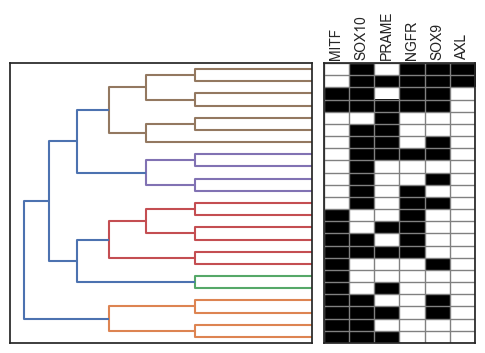

In [358]:
 plot_dend_with_grid(unique_matrix_binary, method = 'complete', marker_names = Diff_state_markers,
                     dend_threshold=thresh, figsize=(6,8), label_clusters=cluster_labels_ordered)

Cluster 1: MITF+ SOX10+ NGFR-
Cluster 2: MITF+ SOX10- NGFR- SOX9- 
Cluster 3: MITF+ NGFR+ 
Cluster 4: MITF- SOX10+
Cluster 5: SOX10+ NGFR+ SO 

In [144]:
cluster_labels

array([5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1,
       1], dtype=int32)

In [ ]:
row_linkage = linkage(unique_matrix_binary, method='complete', metric='euclidean')
row_order = leaves_list(row_linkage)

unique_matrix_binary_ordered = unique_matrix_binary[row_order]
cluster_labels = fcluster(row_linkage, t=thresh, criterion='distance')
cluster_labels_ordered = cluster_labels[row_order]
cluster_labels_reversed = cluster_labels_ordered[::-1]

In [252]:
unique_matrix_binary_ordered

array([[0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

In [253]:
cluster_labels_reversed

array([5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1,
       1], dtype=int32)

In [44]:
def translate_matrix_to_phenotypes(matrix, markers, count=False):
    

    # Function to convert a row to phenotype string
    def row_to_phenotype(row, markers):
        phenotype = []
        for val, marker in zip(row, markers):
            if val == 0:
                phenotype.append(f"{marker}-")
            else:
                phenotype.append(f"{marker}+")
        return " ".join(phenotype)

    # Convert all rows in matrix to phenotype strings
    phenotype_array = [row_to_phenotype(row, markers) for row in matrix]

 
    if count == True:
        # Print counts for each repeating phenotype
        from collections import Counter
        counts = Counter(phenotype_array)
        print("\nPhenotype counts:")
        for pheno, count in counts.most_common():
            print(f"{pheno}: {count}")
    else:
           # Display the phenotype array
        return phenotype_array

In [53]:
# Define marker names for each column
markers = ['MITF', 'SOX10', 'PRAME', 'NGFR', 'SOX9', 'AXL']

unique_matrix_phenotypes = translate_matrix_to_phenotypes(unique_matrix_binary_ordered, markers, count=False)

In [54]:
unique_matrix_phenotypes

['MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+',
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+',
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-',
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-',
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-',
 'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-',
 'MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-',
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-',
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-',
 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-',
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-',
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-',
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-',
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-',
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-',
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-',
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-',
 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-',
 'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-',
 'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-',
 'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-',
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-',
 'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-']

In [155]:
total_cells = combined_tumor_adata.shape[0]
total_cells

418971

In [157]:

phenotype_counts = []
for pheno in unique_matrix_phenotypes:
    count = (combined_tumor_adata['phenotype'] == pheno).sum()
    phenotype_counts.append({'phenotype': pheno, 'cell_count': count, 'percent_of_total_cells': (count/combined_tumor_adata.shape[0]) * 100},)

# Create a new DataFrame with the results
phenotype_count_df = pd.DataFrame(phenotype_counts)
phenotype_count_df.insert(0, 'cluster', cluster_labels_reversed)

print(phenotype_count_df)

    cluster                             phenotype  cell_count  \
0         5  MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+         795   
1         5  MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+         400   
2         5  MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-         709   
3         5  MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-        8629   
4         5  MITF- SOX10- PRAME+ NGFR- SOX9- AXL-        3741   
5         5  MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-        9341   
6         5  MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-       11747   
7         4  MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-        2771   
8         4  MITF- SOX10+ PRAME- NGFR- SOX9- AXL-       18703   
9         4  MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-       40739   
10        4  MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-        1578   
11        3  MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-        7973   
12        3  MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-        2558   
13        3  MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-        2521   
14        3  MITF+ SOX10+

In [162]:
# Calculate cluster cell counts and percent of total cells per cluster
cluster_summary = (
    phenotype_count_df
    .groupby('cluster')
    .agg(cluster_cell_count=('cell_count', 'sum'))
    .reset_index()
)
cluster_summary['percent_of_total_cells'] = (cluster_summary['cluster_cell_count'] / combined_tumor_adata.shape[0]) * 100

print(cluster_summary)

   cluster  cluster_cell_count  percent_of_total_cells
0        1              258653               61.735299
1        2               26632                6.356526
2        3               34533                8.242337
3        4               63791               15.225636
4        5               35362                8.440202


In [321]:
# Get cell counts per cluster from the subsampled DataFrame

cluster_cell_counts = []

for cluster in phenotype_count_df['cluster'].unique():
    phenos = phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype'].tolist()
    count = combined_tumor_adata_sub['phenotype'].isin(phenos).sum()
    cluster_cell_counts.append({'cluster': cluster, 'cell_count': count})

cluster_cell_counts_df = pd.DataFrame(cluster_cell_counts)
print(cluster_cell_counts_df)

   cluster  cell_count
0        5        3857
1        4        7422
2        3        6311
3        2        1705
4        1       15533


In [323]:
phenos = phenotype_count_df.loc[phenotype_count_df['cluster'] == 3, 'phenotype'].tolist()
phenos

['MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-',
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-',
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-',
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-',
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-',
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-']

In [326]:
combined_tumor_adata_sub['phenotype'].isin(['MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-']).sum()

4900

In [327]:
combined_tumor_adata_sub['phenotype'].isin(['MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-'])

0        False
1        False
2        False
3        False
4        False
         ...  
34823    False
34824    False
34825     True
34826     True
34827    False
Name: phenotype, Length: 34828, dtype: bool

In [32]:
Case2_tumor_adata_subset

AnnData object with n_obs × n_vars = 207791 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'ROI', 'phenotype_category'
    uns: 'all_markers', 'gates'
    layers: 'log', 'log1p_raw', 'zscore', 'tumor_zscore'

In [24]:
# Combine Case1,2,3,4 tumor adata subsets into a single DataFrame
# Preserve cell ID (index), phenotype, and add a Case_id column

# List of (adata, case_id) tuples
tumor_adata_subsets = [
    (Case1_tumor_adata_subset, "Case1-38"),
    (Case2_tumor_adata_subset, "Case2-7"),
    (Case3_tumor_adata_subset, "Case3-7"),
    (Case4_tumor_adata_subset, "Case4-2"),
]

dfs = []
for adata, case_id in tumor_adata_subsets:
    df = adata.obs[['phenotype']].copy()
    df['CellID'] = df.index
    df['CaseID'] = case_id
    dfs.append(df)

combined_tumor_adata = pd.concat(dfs, ignore_index=True)
combined_tumor_adata

,phenotype,CellID,CaseID
0,MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_25,Case1-38
1,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Case1-38_R1_feature-extraction_31,Case1-38
2,MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-,Case1-38_R1_feature-extraction_36,Case1-38
3,MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_45,Case1-38
4,MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-,Case1-38_R1_feature-extraction_52,Case1-38
...,...,...,...
418968,MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+,Case4-2_feature-extraction_86974,Case4-2
418969,MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Case4-2_feature-extraction_87006,Case4-2
418970,MITF- SOX10- PRAME+ NGFR- SOX9- AXL-,Case4-2_feature-extraction_87039,Case4-2
418971,MITF- SOX10- PRAME+ NGFR- SOX9- AXL-,Case4-2_feature-extraction_87162,Case4-2


In [316]:

# Find the minimum number of cells across all cases
min_cells = combined_tumor_adata['CaseID'].value_counts().min()

# Subsample each case to min_cells
subsampled_dfs = []
for case in combined_tumor_adata['CaseID'].unique():
    case_df = combined_tumor_adata[combined_tumor_adata['CaseID'] == case]
    subsampled_df = case_df.sample(n=min_cells, random_state=0)
    subsampled_dfs.append(subsampled_df)

# Concatenate subsampled dataframes
combined_tumor_adata_sub = pd.concat(subsampled_dfs, ignore_index=True)

# Now use combined_tumor_adata_sub for your cluster summary
clusters = phenotype_count_df['cluster'].unique()
case_ids = combined_tumor_adata_sub['CaseID'].unique()



## Calculate percent of each case represented in each cluster

In [318]:


# Clean up phenotype strings for exact matching
combined_tumor_adata_sub['phenotype'] = combined_tumor_adata_sub['phenotype'].astype(str).str.strip()
phenotype_count_df['phenotype'] = phenotype_count_df['phenotype'].astype(str).str.strip()

clusters = phenotype_count_df['cluster'].unique()
case_ids = combined_tumor_adata_sub['CaseID'].unique()

summary = []
for cluster in clusters:
    # Get phenotypes for this cluster as a list of strings
    phenos = phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype'].tolist()
    # Filter cells in this cluster (exact match)
    cluster_cells = combined_tumor_adata_sub[combined_tumor_adata_sub['phenotype'].isin(phenos)]
    total_in_cluster = cluster_cells.shape[0]
    row = {'cluster': cluster}
    for case in case_ids:
        n_case = (cluster_cells['CaseID'] == case).sum()
        percent = (n_case / total_in_cluster) * 100 if total_in_cluster > 0 else 0
        row[f'percent_of_cluster_{case}'] = percent
    summary.append(row)

percent_case_per_cluster_df = pd.DataFrame(summary)
percent_case_per_cluster_df.head()

,cluster,percent_of_cluster_Case1-38,percent_of_cluster_Case2-7,percent_of_cluster_Case3-7,percent_of_cluster_Case4-2
0,5,37.334716,12.315271,26.212082,24.137931
1,4,29.385610,26.812180,4.648343,39.153867
2,3,5.403264,0.000000,19.061955,75.534781
3,2,28.152493,20.821114,44.985337,6.041056
4,1,27.457671,37.899955,34.642374,0.000000


In [299]:
phenos = phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']

In [328]:
# Count how many cells with phenotype 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-' are in Case4-2 in the subsampled DataFrame

mask = (
    (combined_tumor_adata_sub['phenotype'] == 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-') &
    (combined_tumor_adata_sub['CaseID'] == 'Case4-2')
)
count = mask.sum()
print("Number of cells in Case4-2 with phenotype 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-':", count)

Number of cells in Case4-2 with phenotype 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-': 4767


In [313]:
phenos= list(phenos)

In [314]:
phenos

['MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-',
 'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-',
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-',
 'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-']

In [286]:
combined_tumor_adata_sub['phenotype'] = combined_tumor_adata_sub['phenotype'].str.strip()
phenos = [p.strip() for p in phenos]

In [292]:
cc = combined_tumor_adata_sub[combined_tumor_adata_sub['phenotype'].isin(phenos)]

In [312]:
print("phenos:", phenos)

phenos: 19    MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
20    MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
21    MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
22    MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Name: phenotype, dtype: object


In [302]:
cluster_cells = combined_tumor_adata_sub[combined_tumor_adata_sub['phenotype'].isin(phenos)]

In [305]:
cluster_cells['phenotype'].unique()

array(['MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-',
       'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-',
       'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-',
       'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-',
       'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-',
       'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-'], dtype=object)

In [279]:
combined_tumor_adata_sub['phenotype'].unique()

array(['MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-',
       'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-',
       'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-',
       'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-',
       'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-',
       'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-',
       'MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-',
       'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-',
       'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-',
       'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-',
       'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-',
       'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-',
       'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-',
       'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-',
       'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-',
       'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-',
       'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-',
       'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-',
       'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-',
       'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-',
       'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+',
       'MITF-

In [311]:
cluster_cells

,phenotype,CellID,CaseID
3,MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_2551,Case1-38
5,MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_16955,Case1-38
7,MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_9155,Case1-38
8,MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_7135,Case1-38
12,MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_10120,Case1-38
...,...,...,...
26111,MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-,Case3-7_feature-extraction_368411,Case3-7
26115,MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-,Case3-7_feature-extraction_168790,Case3-7
26116,MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-,Case3-7_feature-extraction_177209,Case3-7
26117,MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-,Case3-7_feature-extraction_418741,Case3-7


In [308]:
summary = []
for cluster in clusters:
    # Get phenotypes in this cluster
    phenos = phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
    cluster_cells = combined_tumor_adata_sub[combined_tumor_adata_sub['phenotype'].isin(phenos)]
    total_in_cluster = cluster_cells.shape[0]
    row = {'cluster': cluster}
    for case in case_ids:
        n_case = (cluster_cells['CaseID'] == case).sum()
        percent = (n_case / total_in_cluster) * 100 if total_in_cluster > 0 else 0
        row[f'percent_of_cluster_{case}'] = percent
    summary.append(row)

percent_case_per_cluster_df = pd.DataFrame(summary)
percent_case_per_cluster_df.head()

,cluster,percent_of_cluster_Case1-38,percent_of_cluster_Case2-7,percent_of_cluster_Case3-7,percent_of_cluster_Case4-2
0,5,37.334716,12.315271,26.212082,24.137931
1,4,29.385610,26.812180,4.648343,39.153867
2,3,5.403264,0.000000,19.061955,75.534781
3,2,28.152493,20.821114,44.985337,6.041056
4,1,27.457671,37.899955,34.642374,0.000000


## Calculate percent of each cluster represented in each case

In [ ]:


clusters = phenotype_count_df['cluster'].unique()
case_ids = combined_tumor_adata['CaseID'].unique()

# Prepare summary list
summary = []

for case in case_ids:
    case_total = (combined_tumor_adata_sub['CaseID'] == case).sum()
    row = {'CaseID': case}
    for cluster in clusters:
        # Get phenotypes in this cluster
        phenos = phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
        # Filter cells for these phenotypes and this case
        n_cells = combined_tumor_adata_sub[
            (combined_tumor_adata_sub['phenotype'].isin(phenos)) &
            (combined_tumor_adata_sub['CaseID'] == case)
        ].shape[0]
        percent = (n_cells / case_total) * 100 if case_total > 0 else 0
        row[f'percent_cluster_{cluster}'] = percent
    summary.append(row)

# Create DataFrame
percent_cluster_per_case_df = pd.DataFrame(summary)
percent_cluster_per_case_df.head()

,CaseID,percent_cluster_5,percent_cluster_4,percent_cluster_3,percent_cluster_2,percent_cluster_1
0,Case1-38,16.538417,25.048811,3.916389,5.512806,48.983576
1,Case2-7,5.455381,22.855174,0.000000,4.077179,67.612266
2,Case3-7,11.611347,3.962329,13.816470,8.809004,61.800850
3,Case4-2,10.692546,33.375445,54.749052,1.182956,0.000000


In [241]:
percent_case_per_cluster_df.to_csv(savedir + 'percent_case_per_cluster_df.csv', index=False)
percent_cluster_per_case_df.to_csv(savedir + 'percent_cluster_per_case_df.csv', index=False)

In [202]:
# Transpose case_cluster_percent_df so clusters are rows and cases are columns
case_cluster_percent_T = case_cluster_percent_df.set_index('CaseID').T

# Only keep rows that start with 'percent_cluster_'
case_cluster_percent_T = case_cluster_percent_T[case_cluster_percent_T.index.str.startswith('percent_cluster_')]

# Clean up the index to just cluster numbers
case_cluster_percent_T.index = case_cluster_percent_T.index.str.replace('percent_cluster_', '').astype(int)
case_cluster_percent_T = case_cluster_percent_T.sort_index()

# Rename columns to 'percent_of_{case}_cells'
case_id_map = {case: f'percent_of_{case}_cells' for case in case_cluster_percent_df['CaseID']}
case_cluster_percent_T.columns = [case_id_map.get(col, col) for col in case_cluster_percent_T.columns]

# Merge with cluster_case_summary
final_summary = cluster_case_summary.merge(
    case_cluster_percent_T,
    left_on='cluster',
    right_index=True,
    how='left'
)

final_summary.head()



,cluster,total_cells,percent_of_cluster_Case1-38,percent_of_cluster_Case2-7,percent_of_cluster_Case3-7,percent_of_cluster_Case4-2,percent_of_Case1-38_cells,percent_of_Case2-7_cells,percent_of_Case3-7_cells,percent_of_Case4-2_cells
0,5,35362,4.072168,32.905379,58.667496,4.354957,16.538417,5.599858,11.031527,10.685540
1,4,63791,3.418978,76.448088,12.509602,7.623332,25.048811,23.469255,4.243304,33.742714
2,3,34533,0.987461,0.000000,76.309617,22.702922,3.916389,0.000000,14.012475,54.399112
3,2,26632,1.802343,34.927906,62.635176,0.634575,5.512806,4.476614,8.869994,1.172634
4,1,258653,1.648927,53.386584,44.964489,0.000000,48.983576,66.454274,61.842700,0.000000


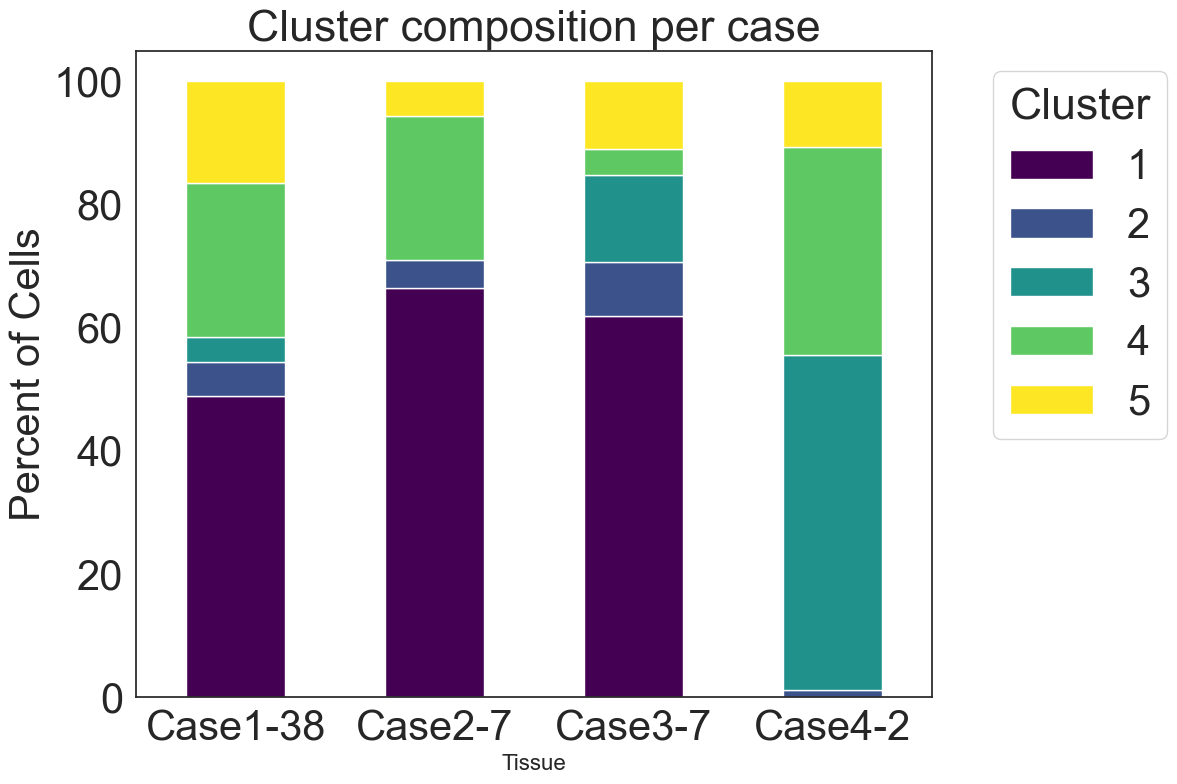

In [436]:
import matplotlib.pyplot as plt

# Transpose so clusters are x-axis, cases are stacked bars
df_plot = case_cluster_percent_df.set_index('CaseID').T

# Only keep rows that start with 'percent_cluster_'
df_plot = df_plot[df_plot.index.str.startswith('percent_cluster_')]

# Clean up the index to just cluster numbers
df_plot.index = df_plot.index.str.replace('percent_cluster_', '').astype(int)
df_plot = df_plot.sort_index()

# Plot
df_plot.T.plot(
    kind='bar',
    stacked=True,
    figsize=(12,8),
    colormap='viridis',
    rot=0,
    fontsize=30   # Set font size for axis tick labels
)
plt.ylabel('Percent of Cells', fontsize=30)
plt.xlabel('Tissue', fontsize=16)
plt.title('Cluster composition per case', fontsize=32)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=30, title_fontsize=32)
plt.tight_layout()
plt.show()

In [329]:
(combined_tumor_adata_sub['CaseID'] == 'Case4-2').sum()

8707

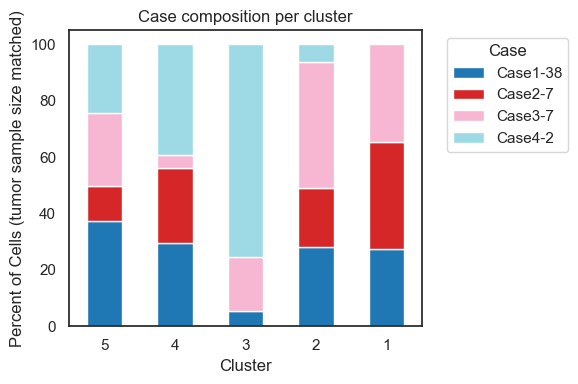

In [201]:
df_plot = cluster_summary2.set_index('cluster')

# Select only columns that start with 'percent_of_cluster_'
case_cols = [col for col in df_plot.columns if col.startswith('percent_of_cluster_')]
df_plot = df_plot[case_cols]

# Clean up column names for legend
df_plot.columns = [col.replace('percent_of_cluster_', '') for col in df_plot.columns]

# Plot: clusters on x, cases as stacked bars
df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    colormap='tab20',
    rot=0
)
plt.ylabel('Percent of Cells (tumor sample size matched)')
plt.xlabel('Cluster')
plt.title('Case composition per cluster')
plt.legend(title='Case', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [205]:
final_summary.head()
print(final_summary.columns)

Index(['cluster', 'total_cells', 'percent_of_cluster_Case1-38',
       'percent_of_cluster_Case2-7', 'percent_of_cluster_Case3-7',
       'percent_of_cluster_Case4-2', 'percent_of_Case1-38_cells',
       'percent_of_Case2-7_cells', 'percent_of_Case3-7_cells',
       'percent_of_Case4-2_cells'],
      dtype='object')


In [206]:
# Assume final_summary has clusters as rows and columns like 'percent_of_Case1-38_cells'
# and case_cluster_percent_df has cases as rows and columns like 'percent_cluster_1', etc.

# Get cluster and case IDs
clusters = final_summary['cluster']
case_ids = combined_tumor_adata['CaseID'].unique()

# Build the table
table = pd.DataFrame(index=clusters, columns=case_ids)

for case in case_ids:
    # % of cluster from this case (case composition per cluster)
    cluster_per_case = final_summary[f'percent_of_{case}_cells'].values
    # % of case in this cluster (cluster composition per case)
    # Find the right column in case_cluster_percent_df
    for i, cluster in enumerate(clusters):
        try:
            case_row = case_cluster_percent_df[case_cluster_percent_df['CaseID'] == case]
            case_in_cluster = case_row[f'percent_cluster_{cluster}'].values[0]
        except Exception:
            case_in_cluster = np.nan
        # Format as requested
        table.loc[cluster, case] = f"{cluster_per_case[i]:.1f}% (of Clust.)\n{case_in_cluster:.1f}% (of Case)"

table.index.name = 'Cluster'
table

,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,16.5% (of Clust.)\n16.5% (of Case),5.6% (of Clust.)\n5.6% (of Case),11.0% (of Clust.)\n11.0% (of Case),10.7% (of Clust.)\n10.7% (of Case)
4,25.0% (of Clust.)\n25.0% (of Case),23.5% (of Clust.)\n23.5% (of Case),4.2% (of Clust.)\n4.2% (of Case),33.7% (of Clust.)\n33.7% (of Case)
3,3.9% (of Clust.)\n3.9% (of Case),0.0% (of Clust.)\n0.0% (of Case),14.0% (of Clust.)\n14.0% (of Case),54.4% (of Clust.)\n54.4% (of Case)
2,5.5% (of Clust.)\n5.5% (of Case),4.5% (of Clust.)\n4.5% (of Case),8.9% (of Clust.)\n8.9% (of Case),1.2% (of Clust.)\n1.2% (of Case)
1,49.0% (of Clust.)\n49.0% (of Case),66.5% (of Clust.)\n66.5% (of Case),61.8% (of Clust.)\n61.8% (of Case),0.0% (of Clust.)\n0.0% (of Case)


In [211]:
def style_cluster_case_table(table):
    styled = (
        table.style
        .set_properties(**{
            'white-space': 'pre',      # preserve line breaks
            'text-align': 'center',    # center text
            'font-size': '13px',       # larger font
            'font-family': 'monospace' # monospace for alignment
        })
        .set_caption("Cluster/Case Composition Table")
    )
    return styled

styled_table = style_cluster_case_table(table)
styled_table

,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,4.1% (of Clust.) 16.5% (of Case),32.9% (of Clust.) 5.6% (of Case),58.7% (of Clust.) 11.0% (of Case),4.4% (of Clust.) 10.7% (of Case)
4,3.4% (of Clust.) 25.0% (of Case),76.4% (of Clust.) 23.5% (of Case),12.5% (of Clust.) 4.2% (of Case),7.6% (of Clust.) 33.7% (of Case)
3,1.0% (of Clust.) 3.9% (of Case),0.0% (of Clust.) 0.0% (of Case),76.3% (of Clust.) 14.0% (of Case),22.7% (of Clust.) 54.4% (of Case)
2,1.8% (of Clust.) 5.5% (of Case),34.9% (of Clust.) 4.5% (of Case),62.6% (of Clust.) 8.9% (of Case),0.6% (of Clust.) 1.2% (of Case)
1,1.6% (of Clust.) 49.0% (of Case),53.4% (of Clust.) 66.5% (of Case),45.0% (of Clust.) 61.8% (of Case),0.0% (of Clust.) 0.0% (of Case)


In [208]:
print(final_summary[[col for col in final_summary.columns if col.startswith('percent_of_')]])
print(case_cluster_percent_df)

   percent_of_cluster_Case1-38  percent_of_cluster_Case2-7  \
0                     4.072168                   32.905379   
1                     3.418978                   76.448088   
2                     0.987461                    0.000000   
3                     1.802343                   34.927906   
4                     1.648927                   53.386584   

   percent_of_cluster_Case3-7  percent_of_cluster_Case4-2  \
0                   58.667496                    4.354957   
1                   12.509602                    7.623332   
2                   76.309617                   22.702922   
3                   62.635176                    0.634575   
4                   44.964489                    0.000000   

   percent_of_Case1-38_cells  percent_of_Case2-7_cells  \
0                  16.538417                  5.599858   
1                  25.048811                 23.469255   
2                   3.916389                  0.000000   
3                   5.512806

In [209]:
for case in case_ids:
    for i, cluster in enumerate(clusters):
        # Cells in this cluster and case
        n_case_in_cluster = combined_tumor_adata[
            (combined_tumor_adata['CaseID'] == case) &
            (combined_tumor_adata['phenotype'].isin(
                phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
            ))
        ].shape[0]
        # Total in cluster
        n_in_cluster = combined_tumor_adata[
            combined_tumor_adata['phenotype'].isin(
                phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
            )
        ].shape[0]
        # Total in case
        n_in_case = (combined_tumor_adata['CaseID'] == case).sum()
        # Calculate
        percent_of_cluster = n_case_in_cluster / n_in_cluster * 100 if n_in_cluster > 0 else 0
        percent_of_case = n_case_in_cluster / n_in_case * 100 if n_in_case > 0 else 0
        table.loc[cluster, case] = f"{percent_of_cluster:.1f}% (of Clust.)\n{percent_of_case:.1f}% (of Case)"

In [213]:
for case in case_ids:
    for i, cluster in enumerate(clusters):
        # Use the subsampled DataFrame
        n_case_in_cluster = combined_tumor_adata_sub[
            (combined_tumor_adata_sub['CaseID'] == case) &
            (combined_tumor_adata_sub['phenotype'].isin(
                phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
            ))
        ].shape[0]
        n_in_cluster = combined_tumor_adata_sub[
            combined_tumor_adata_sub['phenotype'].isin(
                phenotype_count_df.loc[phenotype_count_df['cluster'] == cluster, 'phenotype']
            )
        ].shape[0]
        n_in_case = (combined_tumor_adata_sub['CaseID'] == case).sum()
        percent_of_cluster = n_case_in_cluster / n_in_cluster * 100 if n_in_cluster > 0 else 0
        percent_of_case = n_case_in_cluster / n_in_case * 100 if n_in_case > 0 else 0
        table.loc[cluster, case] = f"{percent_of_cluster:.1f}% (of Clust.)\n{percent_of_case:.1f}% (of Case)"

In [214]:
table

,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,37.3% (of Clust.)\n16.5% (of Case),12.3% (of Clust.)\n5.5% (of Case),26.2% (of Clust.)\n11.6% (of Case),24.1% (of Clust.)\n10.7% (of Case)
4,29.4% (of Clust.)\n25.0% (of Case),26.8% (of Clust.)\n22.9% (of Case),4.6% (of Clust.)\n4.0% (of Case),39.2% (of Clust.)\n33.4% (of Case)
3,5.4% (of Clust.)\n3.9% (of Case),0.0% (of Clust.)\n0.0% (of Case),19.1% (of Clust.)\n13.8% (of Case),75.5% (of Clust.)\n54.7% (of Case)
2,28.2% (of Clust.)\n5.5% (of Case),20.8% (of Clust.)\n4.1% (of Case),45.0% (of Clust.)\n8.8% (of Case),6.0% (of Clust.)\n1.2% (of Case)
1,27.5% (of Clust.)\n49.0% (of Case),37.9% (of Clust.)\n67.6% (of Case),34.6% (of Clust.)\n61.8% (of Case),0.0% (of Clust.)\n0.0% (of Case)


In [227]:
import re

# 1. Extract numeric values
def extract_percent(table, which='cluster'):
    # which: 'cluster' or 'case'
    percent_df = table.copy()
    for idx in percent_df.index:
        for col in percent_df.columns:
            val = percent_df.loc[idx, col]
            if isinstance(val, str):
                match = re.findall(r"([\d\.]+)% \(of Clust\.\)\n([\d\.]+)% \(of Case\)", val)
                if match:
                    cluster_val, case_val = map(float, match[0])
                    percent_df.loc[idx, col] = cluster_val if which == 'cluster' else case_val
                else:
                    percent_df.loc[idx, col] = np.nan
    return percent_df.astype(float)


cluster_percent = extract_percent(table, which='cluster').round(1)
case_percent = extract_percent(table, which='case').round(1)

# Style with gradients and format to 1 decimal place (no trailing zeros)
styled_cluster = (
    cluster_percent
    .style
    .background_gradient(cmap='Blues')
    .format("{:.1f}")
    .set_caption('% of Cluster')
)
styled_case = (
    case_percent
    .style
    .background_gradient(cmap='Greens')
    .format("{:.1f}")
    .set_caption('% of Case')
)

from IPython.display import display
display(styled_cluster)
display(styled_case)

,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,37.3,12.3,26.2,24.1
4,29.4,26.8,4.6,39.2
3,5.4,0.0,19.1,75.5
2,28.2,20.8,45.0,6.0
1,27.5,37.9,34.6,0.0


,Case1-38,Case2-7,Case3-7,Case4-2
Cluster,,,,
5,16.5,5.5,11.6,10.7
4,25.0,22.9,4.0,33.4
3,3.9,0.0,13.8,54.7
2,5.5,4.1,8.8,1.2
1,49.0,67.6,61.8,0.0


In [240]:
# Export styled_case with gradient to Excel
styled_case.to_excel(savedir+"styled_case_gradient.xlsx")

styled_cluster.to_excel(savedir+"styled_cluster_gradient.xlsx")

In [275]:
# Should be True for all
print(all([p in set(combined_tumor_adata_sub['phenotype']) for p in phenos]))

True


In [277]:
filtered = combined_tumor_adata_sub[combined_tumor_adata_sub['phenotype'].isin(phenos)]
print("Unique phenotypes in filtered:", filtered['phenotype'].unique())
print("Phenotypes in phenos but not in filtered:", [p for p in phenos if p not in filtered['phenotype'].unique()])
print("Phenotypes in filtered but not in phenos:", [p for p in filtered['phenotype'].unique() if p not in phenos])

Unique phenotypes in filtered: ['MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-'
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-'
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-'
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-'
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-'
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-']
Phenotypes in phenos but not in filtered: []
Phenotypes in filtered but not in phenos: ['MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-', 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-', 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-', 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-', 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-', 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-']


In [251]:
# Find phenotypes in cluster 3 that are NOT present in Case4-2
cluster3_phenos = set(phenotype_count_df.loc[phenotype_count_df['cluster'] == 3, 'phenotype'])
case4_phenos = set(case4_cells['phenotype'].unique())
print("Phenotypes in cluster 3 but not in Case4-2:")
print(cluster3_phenos - case4_phenos)
print("Phenotypes in Case4-2 but not in cluster 3:")
print(case4_phenos - cluster3_phenos)

Phenotypes in cluster 3 but not in Case4-2:
{'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-', 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-', 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-', 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-', 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-'}
Phenotypes in Case4-2 but not in cluster 3:
{'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-', 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-', 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-', 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-', 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-', 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+', 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-', 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+'}


In [248]:
# Filter Case4-2 cells
case4_cells = combined_tumor_adata[combined_tumor_adata['CaseID'] == 'Case4-2']
# Count MITF+ cells
mitf_pos = case4_cells['phenotype'].str.contains('MITF\+', regex=True).sum()
mitf_neg = case4_cells['phenotype'].str.contains('MITF\-', regex=True).sum()
print(f"Case4-2 MITF+: {mitf_pos}, MITF-: {mitf_neg}")

Case4-2 MITF+: 169, MITF-: 14243


## AP1 Heatmap

In [359]:
phenotype_count_df

,cluster,phenotype,cell_count,percent_of_total_cells
0,5,MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+,795,0.189751
1,5,MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+,400,0.095472
2,5,MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-,709,0.169224
3,5,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,8629,2.059570
4,5,MITF- SOX10- PRAME+ NGFR- SOX9- AXL-,3741,0.892902
5,5,MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-,9341,2.229510
6,5,MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-,11747,2.803774
7,4,MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-,2771,0.661382
8,4,MITF- SOX10+ PRAME- NGFR- SOX9- AXL-,18703,4.464032
9,4,MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-,40739,9.723585


In [402]:

# Ensure phenotype strings are stripped for exact matching
Case4_tumor_adata_subset.obs['phenotype'] = Case4_tumor_adata_subset.obs['phenotype'].astype(str).str.strip()
phenotype_count_df['phenotype'] = phenotype_count_df['phenotype'].astype(str).str.strip()

# Create a mapping from phenotype to cluster
pheno_to_cluster = dict(zip(phenotype_count_df['phenotype'], phenotype_count_df['cluster']))

# Map the cluster to each cell's phenotype
Case4_tumor_adata_subset.obs['phenotype_cross_cluster'] = Case4_tumor_adata_subset.obs['phenotype'].map(pheno_to_cluster)

# Optional: check the result
print(Case4_tumor_adata_subset.obs[['phenotype', 'phenotype_cross_cluster']].head())

                                                             phenotype  \
Case4-2_feature-extraction_11112  MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+   
Case4-2_feature-extraction_11239  MITF- SOX10- PRAME+ NGFR- SOX9- AXL-   
Case4-2_feature-extraction_11705  MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-   
Case4-2_feature-extraction_11869  MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-   
Case4-2_feature-extraction_12368  MITF- SOX10- PRAME+ NGFR- SOX9- AXL-   

                                  phenotype_cross_cluster  
Case4-2_feature-extraction_11112                        5  
Case4-2_feature-extraction_11239                        5  
Case4-2_feature-extraction_11705                        4  
Case4-2_feature-extraction_11869                        3  
Case4-2_feature-extraction_12368                        5  


In [381]:
Case3_tumor_adata_subset.obs['phenotype'].value_counts()

phenotype
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-    65156
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-    38061
MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-    17024
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-    10482
MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-     9804
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-     9341
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-     8009
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-     7980
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-     6877
MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-     4249
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-     3396
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-     2603
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-     2558
MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-     2521
Name: count, dtype: int64

In [408]:
subsetMarkers = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
hm.heatmapnew(Case2_tumor_adata_subset, groupBy='phenotype_cross_cluster', layer = 'tumor_zscore' , 
            standardScale='column', subsetMarkers=subsetMarkers, 
            figsize=(4,2), showPrevalence=True, 
            x_tick_rotation=45,
            orderColumn=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            orderRow= [5,4,2,1], 
            clusterRows= False, clusterColumns=False,
            scale_title ='Standardized mean z-score', y_lab='Cluster',
            phenotype_labels=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            vmin=-2, vmax=2,
            saveDir=savedir,
            
            fileName='Case2-7_ap1state_heatmap_cross.png'
             )

Saved heatmap to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case2-7_ap1state_heatmap_cross.png


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1667: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



In [413]:
import pandas as pd

# Convert 'phenotype_cross_cluster' to categorical for all Case tumor adata subsets
for adata in [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset]:
    if 'phenotype_cross_cluster' in adata.obs.columns:
        adata.obs['phenotype_cross_cluster'] = pd.Categorical(adata.obs['phenotype_cross_cluster'])

scatter plot

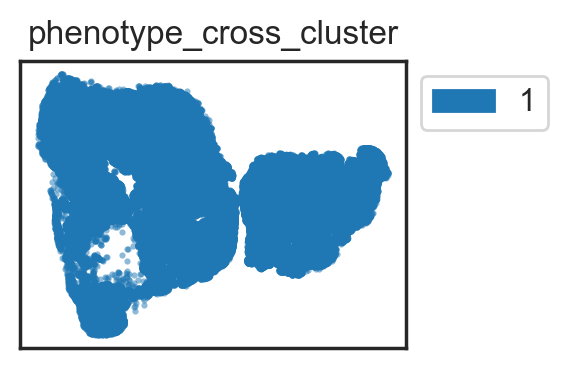

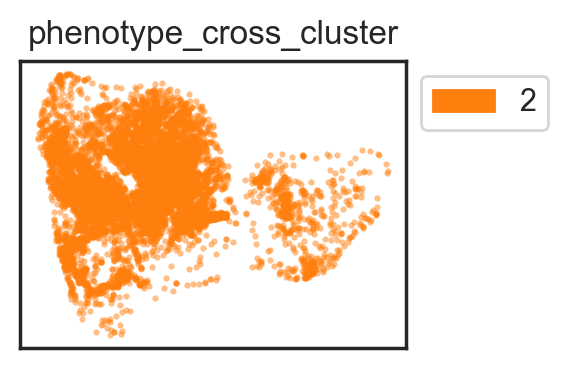

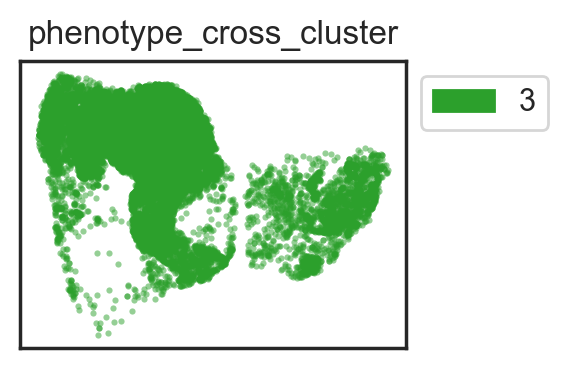

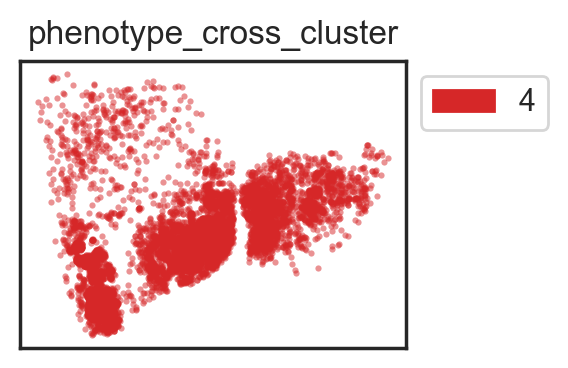

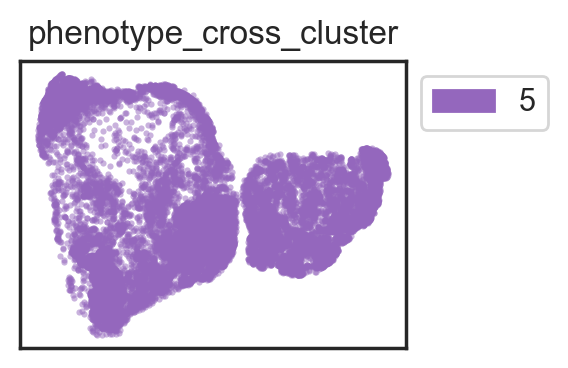

In [417]:
color_palette = {
    1: "#1f77b4",  # Blue
    2: "#ff7f0e",  # Orange
    3: "#2ca02c",  # Green
    4: "#d62728",  # Red
    5: "#9467bd",  # Purple
    6: "#8c564b",  # Brown
    7: "#e377c2"   # Pink
}

# Loop through subset values 1 to 7
for subset_value in range(1, 6):
    # Set the current axis
    hm.spatial_scatterPlot(
        adata=Case3_tumor_adata_subset,
        colorBy=['phenotype_cross_cluster'],
        customColors=color_palette,
        subset_layer='phenotype_cross_cluster',
        subset_values=[subset_value],
        alpha=0.5,  # Adjust transparency
        s=5,
        figsize=(3,2)        # Adjust marker size
    )
    ax.set_title(f"Cluster {subset_value}", fontsize=10)
    plt.tight_layout()
    plt.savefig(f"{savedir}Case3-7_spatial_cluster{subset_value}.png", dpi=300)
    plt.close()

In [419]:
combined_tumor_adata

,phenotype,CellID,CaseID
0,MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_25,Case1-38
1,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Case1-38_R1_feature-extraction_31,Case1-38
2,MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-,Case1-38_R1_feature-extraction_36,Case1-38
3,MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-,Case1-38_R1_feature-extraction_45,Case1-38
4,MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-,Case1-38_R1_feature-extraction_52,Case1-38
...,...,...,...
418966,MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+,Case4-2_feature-extraction_86974,Case4-2
418967,MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Case4-2_feature-extraction_87006,Case4-2
418968,MITF- SOX10- PRAME+ NGFR- SOX9- AXL-,Case4-2_feature-extraction_87039,Case4-2
418969,MITF- SOX10- PRAME+ NGFR- SOX9- AXL-,Case4-2_feature-extraction_87162,Case4-2


## Combine anndata objects while preserving ImageIDs for analyses and visualizations with all image data

In [10]:
Case1_tumor_adata_subset.obs['ImageID'] = 'Case1-38'
Case2_tumor_adata_subset.obs['ImageID'] = 'Case2-7'
Case3_tumor_adata_subset.obs['ImageID'] = 'Case3-7'
Case4_tumor_adata_subset.obs['ImageID'] = 'Case4-2'

# Concatenate all subsets into one AnnData object
combined_adata = ad.concat(
    [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset],
    join='outer',
    label='ImageID',
    keys=['Case1-38', 'Case2-7', 'Case3-7', 'Case4-2'],
    index_unique=None
)

In [11]:
combined_adata.obs['imageid'] = (
    combined_adata.obs['imageid']
    .str.replace('_feature-extraction', '', regex=False)
    .str.replace('_R1', '', regex=False)
)

In [12]:
combined_adata

AnnData object with n_obs × n_vars = 418973 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI', 'MITF_positivity', 'SOX10_positivity', 'PRAME_positivity', 'AXL_positivity', 'SOX9_positivity', 'NGFR_positivity', 'cFOS_positivity', 'FRA1_positivity', 'FRA2_positivity', 'cJUN_positivity', 'JUNB_positivity', 'JUND_positivity', 'ImageID'
    layers: 'log', 'log1p_raw', 'tumor_zscore', 'log_background_normalized'

In [33]:
combined_adata.write_h5ad(savedir + 'combined_tumor_adata.h5ad')

In [13]:
combined_adata.obs['imageid'].value_counts()

imageid
Case2-7     207791
Case3-7     188061
Case4-2      14414
Case1-38      8707
Name: count, dtype: int64

In [34]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

Pixel distribution plot of markers across cases

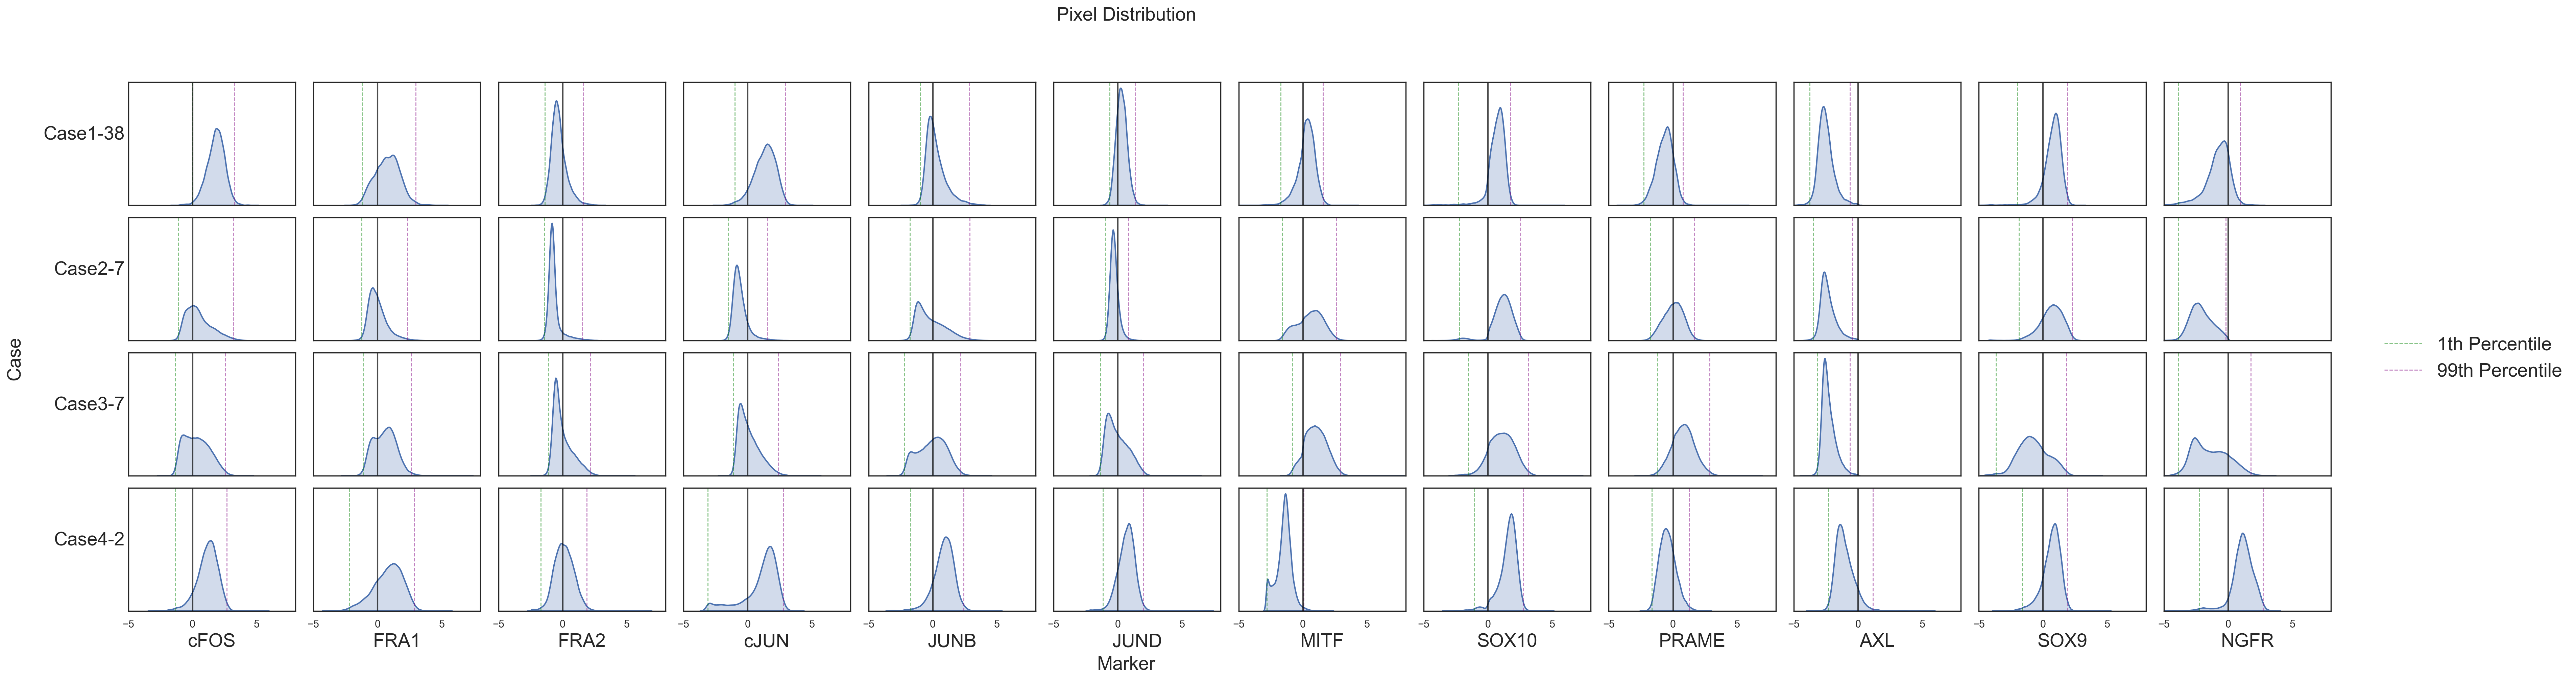

In [35]:
hm.distPlot3(combined_adata, layer='log_background_normalized', multiple_cases= True,
             markers=AP1s + Diff_state_markers,
              figsize=(16,10),ncols=13, fontsize=20,scale_x1=-5, scale_x2=8, vline=0,)

In [64]:
for adata, case_id in zip(
    [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset],
    ['Case1-38', 'Case2-7', 'Case3-7', 'Case4-2']
):
    # Subset for cluster 3
    cluster3_cells = adata.obs['phenotype_cross_cluster'] == 2
    adata_cluster3 = adata[cluster3_cells, :]

    # Prepare data for violin plot
    plot_data = []
    for marker in AP1s:
        if 'log_background_normalized' in adata_cluster3.layers:
            values = adata_cluster3.layers['log_background_normalized'][:, adata_cluster3.var_names.get_loc(marker)]
        else:
            values = adata_cluster3[:, marker].X
        plot_data.append(pd.DataFrame({
            'AP1': marker,
            'log_background_normalized': values.flatten()
        }))
    plot_df = pd.concat(plot_data, ignore_index=True)

    plt.figure(figsize=(8, 4))
    sns.violinplot(x='AP1', y='log_background_normalized', data=plot_df, inner='box', cut=0)
    plt.title(f'Pixel intensity for AP1s in {case_id}, Cluster 2')
    plt.ylabel('Pixel Intensity (ln(Pixel intensity) - ln(background)) (a.u.)')
    plt.xlabel('AP1 Marker')
    plt.tight_layout()
    plt.show()

KeyError: 'phenotype_cross_cluster'

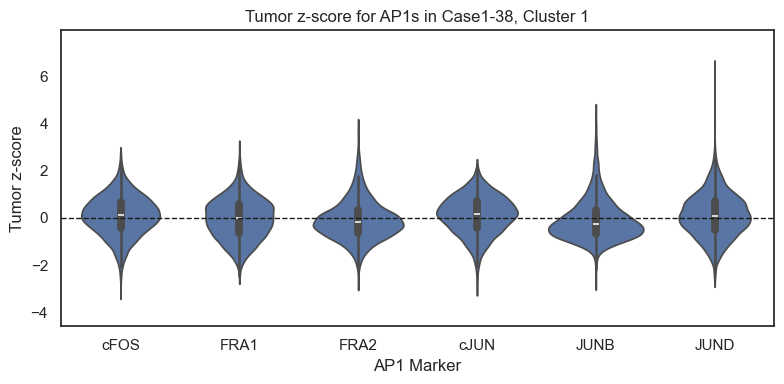

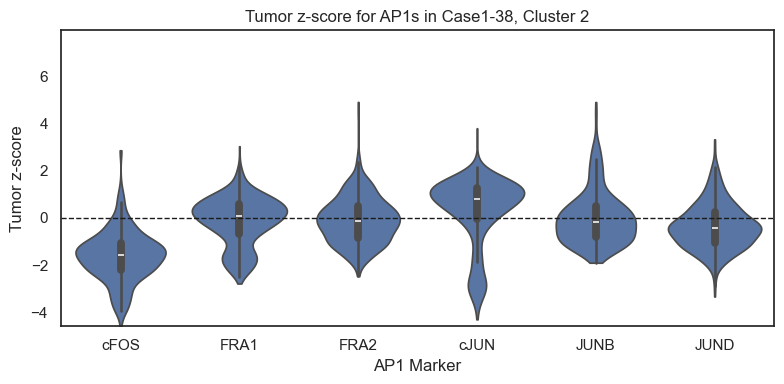

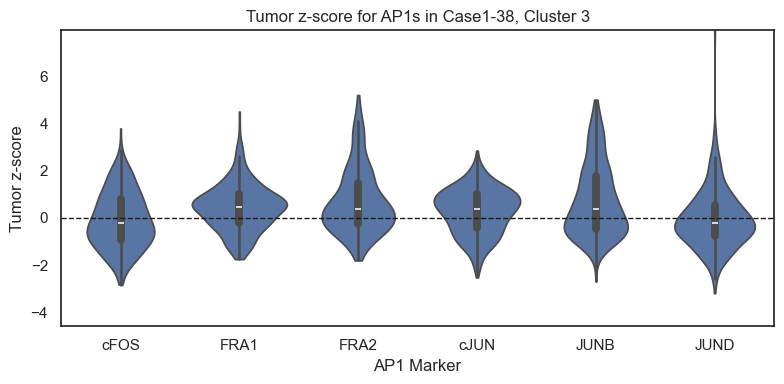

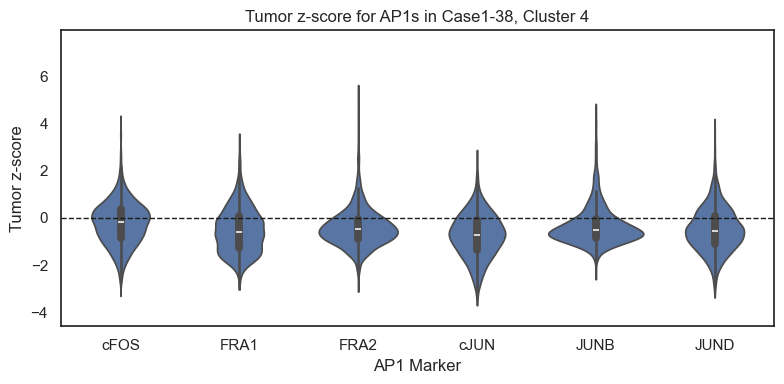

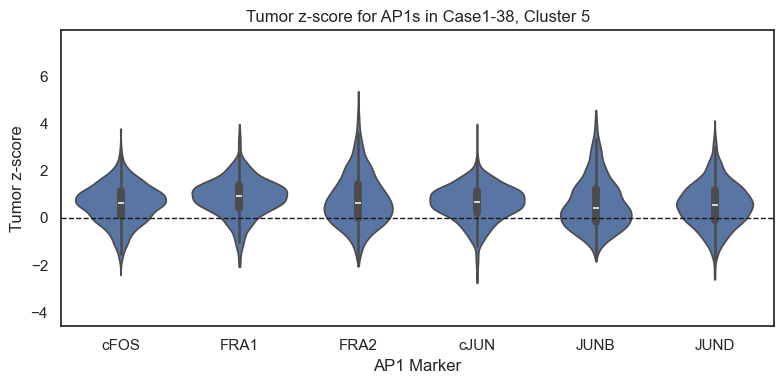

In [426]:
clusters = sorted(Case1_tumor_adata_subset.obs['phenotype_cross_cluster'].dropna().unique())

# Collect all tumor_zscore values for AP1s across all clusters to determine y-axis limits
all_scores = []
for cluster in clusters:
    cluster_cells = Case1_tumor_adata_subset.obs['phenotype_cross_cluster'] == cluster
    adata_cluster = Case1_tumor_adata_subset[cluster_cells, :]
    for marker in AP1s:
        if 'tumor_zscore' in adata_cluster.layers:
            values = adata_cluster.layers['tumor_zscore'][:, adata_cluster.var_names.get_loc(marker)]
        else:
            values = adata_cluster[:, marker].X
        all_scores.extend(values.flatten())
ymin = np.nanmin(all_scores)
ymax = np.nanmax(all_scores)

for cluster in clusters:
    cluster_cells = Case1_tumor_adata_subset.obs['phenotype_cross_cluster'] == cluster
    adata_cluster = Case1_tumor_adata_subset[cluster_cells, :]

    plot_data = []
    for marker in AP1s:
        if 'tumor_zscore' in adata_cluster.layers:
            values = adata_cluster.layers['tumor_zscore'][:, adata_cluster.var_names.get_loc(marker)]
        else:
            values = adata_cluster[:, marker].X
        plot_data.append(pd.DataFrame({
            'AP1': marker,
            'tumor_zscore': values.flatten()
        }))
    plot_df = pd.concat(plot_data, ignore_index=True)

    plt.figure(figsize=(8, 4))
    sns.violinplot(x='AP1', y='tumor_zscore', data=plot_df, inner='box', cut=0)
    plt.title(f'Tumor z-score for AP1s in Case1-38, Cluster {cluster}')
    plt.ylabel('Tumor z-score')
    plt.xlabel('AP1 Marker')
    plt.ylim(ymin, ymax)
    plt.axhline(0, color='k', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

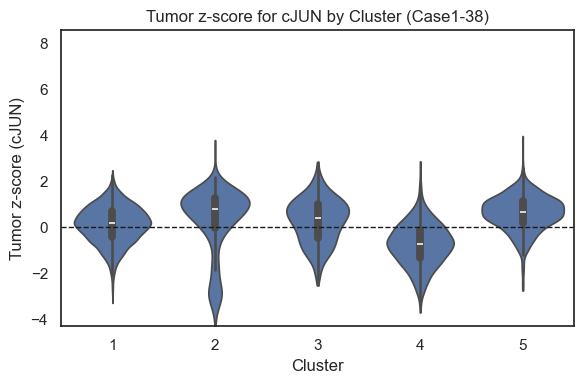

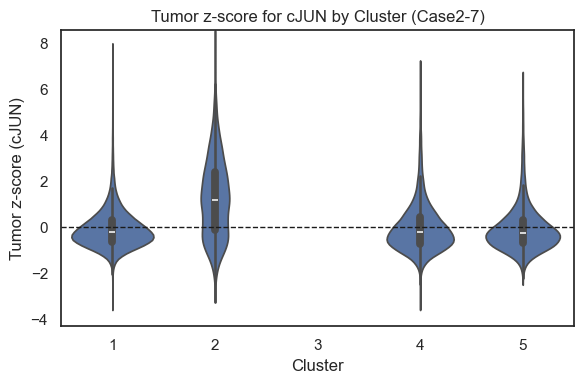

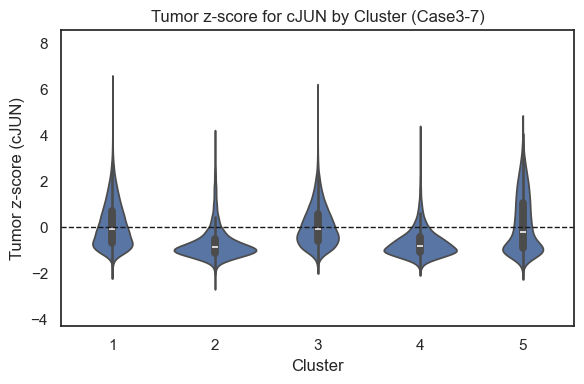

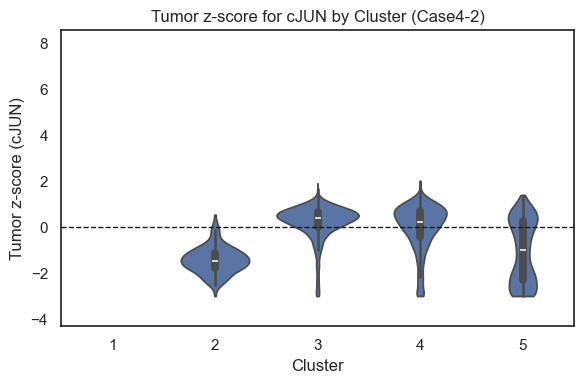

In [429]:
# Get all unique clusters across all cases
all_clusters = set()
for adata in [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset]:
    all_clusters.update(adata.obs['phenotype_cross_cluster'].dropna().unique())
all_clusters = sorted(all_clusters)

# Find global y-axis limits for cJUN tumor_zscore across all cases and clusters
all_scores = []
for adata in [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset]:
    for cluster in all_clusters:
        cluster_cells = adata.obs['phenotype_cross_cluster'] == cluster
        if cluster_cells.sum() == 0:
            continue
        adata_cluster = adata[cluster_cells, :]
        if 'tumor_zscore' in adata_cluster.layers:
            values = adata_cluster.layers['tumor_zscore'][:, adata_cluster.var_names.get_loc('cJUN')]
        else:
            values = adata_cluster[:, 'cJUN'].X
        all_scores.extend(values.flatten())
ymin = np.nanmin(all_scores)
ymax = np.nanmax(all_scores)

# Plot for each case, always showing all clusters on x axis (empty if missing)
for case_id, adata in case_adata_dict.items():
    plot_data = []
    for cluster in all_clusters:
        cluster_cells = adata.obs['phenotype_cross_cluster'] == cluster
        if cluster_cells.sum() == 0:
            # Add empty data for missing cluster
            plot_data.append(pd.DataFrame({'Cluster': [cluster], 'cJUN_tumor_zscore': [np.nan]}))
            continue
        adata_cluster = adata[cluster_cells, :]
        if 'tumor_zscore' in adata_cluster.layers:
            values = adata_cluster.layers['tumor_zscore'][:, adata_cluster.var_names.get_loc('cJUN')]
        else:
            values = adata_cluster[:, 'cJUN'].X
        plot_data.append(pd.DataFrame({
            'Cluster': cluster,
            'cJUN_tumor_zscore': values.flatten()
        }))
    plot_df = pd.concat(plot_data, ignore_index=True)

    plt.figure(figsize=(6, 4))
    sns.violinplot(
        x='Cluster',
        y='cJUN_tumor_zscore',
        data=plot_df,
        inner='box',
        cut=0,
        order=all_clusters
    )
    plt.title(f'Tumor z-score for cJUN by Cluster ({case_id})')
    plt.ylabel('Tumor z-score (cJUN)')
    plt.xlabel('Cluster')
    plt.ylim(ymin, ymax)
    plt.axhline(0, color='k', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

In [41]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

In [115]:
 
combined_adata_subset = hm.threshold_phenotype_by_prevalence(combined_adata, threshold=0.001, verbose=False, return_adata=True)

In [54]:
combined_adata.obs['ImageID'].value_counts()

ImageID
Case2-7     207791
Case3-7     188061
Case4-2      14414
Case1-38      8707
Name: count, dtype: int64

[[0 2 0 4 5 6]
 [0 2 0 4 0 0]
 [0 2 3 4 5 0]
 [0 2 0 4 5 0]
 [1 2 0 4 0 0]
 [1 0 0 4 0 0]
 [1 2 3 4 0 0]
 [1 0 3 4 0 0]
 [1 2 3 4 5 0]
 [1 2 0 4 5 0]
 [0 2 3 0 5 0]
 [0 2 0 0 5 0]
 [1 2 3 0 5 0]
 [1 2 0 0 5 0]
 [1 2 3 0 0 0]
 [1 2 0 0 0 0]
 [0 2 3 0 0 0]
 [0 2 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 3 0 0 0]
 [0 0 3 0 0 0]]
['MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+'
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-'
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-'
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-'
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-'
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-'
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-'
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-'
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-'
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-'
 'MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-'
 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-'
 'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-'
 'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-'
 'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-'
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-'
 'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-'
 'MI

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1616: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



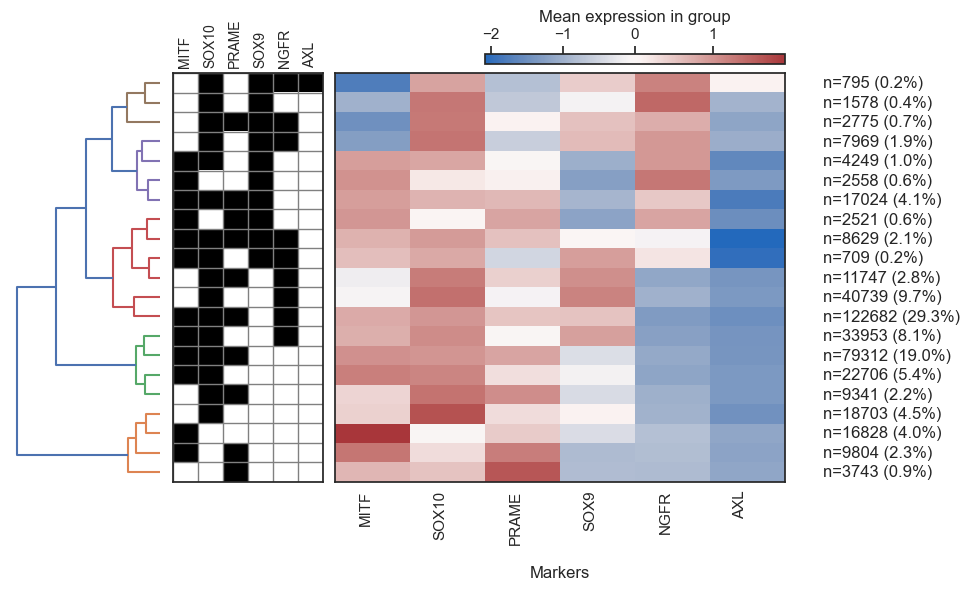

In [122]:
phenotype_cross_cluster = hm.heatmapnew(
    combined_adata_subset,
    groupBy='phenotype',
    layer='log_background_normalized',
    subsetMarkers=Diff_state_markers,
    
    clusterRows=True,
    clusterColumns=False,
    standardScale='column',
    showPrevalence=True,
    cmap='vlag',
    figsize=(10,7),
    scale_title=None,
    dend_threshold=2.5,
    dend_axis = False,
    y_lab='Categories',
    row_dendrogram=True,
    phenotype_matrix=True,
    phenotype_labels=Diff_state_markers,
    clustering_method='ward',
    verbose=True,
    return_row_linkage=True,
   
)

In [117]:

arr = np.array([
    [0, 2, 3, 4, 5, 6],
    [0, 2, 0, 4, 5, 6],
    [0, 2, 0, 4, 0, 0],
    [0, 2, 3, 4, 5, 0],
    [0, 2, 0, 4, 5, 0],
    [1, 2, 0, 4, 0, 0],
    [1, 0, 0, 4, 0, 0],
    [1, 2, 3, 4, 0, 0],
    [1, 0, 3, 4, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 3, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [1, 2, 0, 4, 5, 0],
    [1, 0, 0, 0, 5, 0],
    [0, 2, 3, 0, 5, 0],
    [0, 2, 0, 0, 5, 0],
    [1, 2, 3, 0, 5, 0],
    [1, 2, 0, 0, 5, 0],
    [1, 2, 3, 4, 5, 0],
    [1, 2, 3, 0, 0, 0],
    [1, 2, 0, 0, 0, 0],
    [0, 2, 3, 0, 0, 0],
    [0, 2, 0, 0, 0, 0]
])

binary_arr = (arr != 0).astype(int)
print(binary_arr)

[[0 1 1 1 1 1]
 [0 1 0 1 1 1]
 [0 1 0 1 0 0]
 [0 1 1 1 1 0]
 [0 1 0 1 1 0]
 [1 1 0 1 0 0]
 [1 0 0 1 0 0]
 [1 1 1 1 0 0]
 [1 0 1 1 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]
 [1 1 0 1 1 0]
 [1 0 0 0 1 0]
 [0 1 1 0 1 0]
 [0 1 0 0 1 0]
 [1 1 1 0 1 0]
 [1 1 0 0 1 0]
 [1 1 1 1 1 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 0 0 0]]


In [174]:
cross_cluster_linkage

{'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-': 1,
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-': 1,
 'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-': 2,
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-': 2,
 'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-': 2,
 'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-': 2,
 'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-': 3,
 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-': 3,
 'MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-': 3,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-': 3,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-': 3,
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-': 3,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-': 4,
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-': 4,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-': 4,
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-': 4,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-': 5,
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-': 5,
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+': 5}

In [137]:
combined_adata_subset

AnnData object with n_obs × n_vars = 418365 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI', 'MITF_positivity', 'SOX10_positivity', 'PRAME_positivity', 'AXL_positivity', 'SOX9_positivity', 'NGFR_positivity', 'cFOS_positivity', 'FRA1_positivity', 'FRA2_positivity', 'cJUN_positivity', 'JUNB_positivity', 'JUND_positivity', 'ImageID', 'phenotype_cross_cluster'
    layers: 'log', 'log1p_raw', 'tumor_zscore', 'log_background_normalized'

In [123]:
# Assuming 'phenotype' is the column in .obs with the phenotype for each cell
# and phenotype_cross_cluster maps phenotype to cluster

# Map phenotype to cluster assignment
combined_adata_subset.obs['phenotype_cross_cluster'] = combined_adata_subset.obs['phenotype'].map(phenotype_cross_cluster)

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_37959/135474472.py:5: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [125]:
combined_adata_subset.obs['phenotype_cross_cluster'].value_counts()

phenotype_cross_cluster
3    187027
2    145312
1     49078
4     31800
5      5148
Name: count, dtype: int64

In [ ]:
row_linkage = linkage(comb, method='complete', metric='euclidean')
row_order = leaves_list(row_linkage)

unique_matrix_binary_ordered = unique_matrix_binary[row_order]
cluster_labels = fcluster(row_linkage, t=thresh, criterion='distance')
cluster_labels_ordered = cluster_labels[row_order]
cluster_labels_reversed = cluster_labels_ordered[::-1]

In [134]:
phenotype_counts = []
for pheno in combined_adata_subset.obs['phenotype'].unique():
    count = (combined_adata_subset.obs['phenotype'] == pheno).sum()
    phenotype_counts.append({'phenotype': pheno, 'cell_count': count, 'percent_of_total_cells': (count/combined_adata_subset.shape[0]) * 100},)

# Create a new DataFrame with the results
phenotype_count_df = pd.DataFrame(phenotype_counts)
#phenotype_count_df.insert(0, 'cluster', cluster_labels_reversed)

print(phenotype_count_df)

                               phenotype  cell_count  percent_of_total_cells
0   MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-        8629                2.062553
1   MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-       22706                5.427318
2   MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-         709                0.169469
3   MITF+ SOX10- PRAME- NGFR- SOX9- AXL-       16828                4.022325
4   MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-       33953                8.115641
5   MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-       40739                9.737669
6   MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-        7969                1.904796
7   MITF- SOX10+ PRAME- NGFR- SOX9- AXL-       18703                4.470498
8   MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-      122682               29.324155
9   MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-       11747                2.807835
10  MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-       79312               18.957609
11  MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-       17024                4.069174

In [136]:

phenotype_count_df['phenotype_cross_cluster'] = phenotype_count_df['phenotype'].map(phenotype_cross_cluster)
phenotype_count_df

,phenotype,cell_count,percent_of_total_cells,phenotype_cross_cluster
0,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,8629,2.062553,3
1,MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-,22706,5.427318,2
2,MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-,709,0.169469,3
3,MITF+ SOX10- PRAME- NGFR- SOX9- AXL-,16828,4.022325,1
4,MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-,33953,8.115641,2
5,MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-,40739,9.737669,3
6,MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-,7969,1.904796,4
7,MITF- SOX10+ PRAME- NGFR- SOX9- AXL-,18703,4.470498,1
8,MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-,122682,29.324155,3
9,MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-,11747,2.807835,3


In [151]:
clusters = combined_adata_subset.obs['phenotype_cross_cluster'].unique()
case_ids = combined_adata_subset.obs['ImageID'].unique()

# Prepare summary list
summary = []

for case in case_ids:
    case_total = (combined_adata_subset.obs['ImageID'] == case).sum()
    row = {'CaseID': case}
    for cluster in clusters:
        # Get phenotypes in this cluster
        phenos = phenotype_count_df.loc[phenotype_count_df['phenotype_cross_cluster'] == cluster, 'phenotype']
        # Filter cells for these phenotypes and this case
        n_cells = combined_adata_subset[
            (combined_adata_subset.obs['phenotype'].isin(phenos)) &
            (combined_adata_subset.obs['ImageID'] == case)
        ].shape[0]
        percent = (n_cells / case_total) * 100 if case_total > 0 else 0
        row[f'percent_cluster_{cluster}'] = percent
    summary.append(row)

# Create DataFrame
percent_cluster_per_case_df = pd.DataFrame(summary)
percent_cluster_per_case_df.head()

,CaseID,percent_cluster_3,percent_cluster_2,percent_cluster_1,percent_cluster_4,percent_cluster_5
0,Case1-38,46.570185,42.581480,9.283445,1.564890,0.000000
1,Case2-7,64.561025,26.041070,9.397905,0.000000,0.000000
2,Case3-7,25.837893,46.571059,14.919095,12.671952,0.000000
3,Case4-2,2.326245,0.000000,5.023548,55.915513,36.734694


In [144]:
combined_adata_subset.obs['phenotype_cross_cluster'].unique()

array([3, 2, 1, 4, 5])

In [159]:
percent_cluster_per_case_df
#case_cluster_percent_T = case_cluster_percent_T[case_cluster_percent_T.index.str.startswith('percent_cluster_')]

case_cluster_percent_T

,percent_of_Case1-38_cells,percent_of_Case2-7_cells,percent_of_Case3-7_cells,percent_of_Case4-2_cells
1,9.283445,9.397905,14.919095,5.023548
2,42.581480,26.041070,46.571059,0.000000
3,46.570185,64.561025,25.837893,2.326245
4,1.564890,0.000000,12.671952,55.915513
5,0.000000,0.000000,0.000000,36.734694


In [155]:
# Transpose case_cluster_percent_df so clusters are rows and cases are columns
case_cluster_percent_T = percent_cluster_per_case_df.set_index('CaseID').T

# Only keep rows that start with 'percent_cluster_'
case_cluster_percent_T = case_cluster_percent_T[case_cluster_percent_T.index.str.startswith('percent_cluster_')]

# Clean up the index to just cluster numbers
case_cluster_percent_T.index = case_cluster_percent_T.index.str.replace('percent_cluster_', '').astype(int)
case_cluster_percent_T = case_cluster_percent_T.sort_index()

# Rename columns to 'percent_of_{case}_cells'
case_id_map = {case: f'percent_of_{case}_cells' for case in percent_cluster_per_case_df['CaseID']}
case_cluster_percent_T.columns = [case_id_map.get(col, col) for col in case_cluster_percent_T.columns]

case_cluster_percent_T.head()
'''
# Merge with cluster_case_summary
final_summary = cluster_case_summary.merge(
    case_cluster_percent_T,
    left_on='cluster',
    right_index=True,
    how='left'
)

final_summary.head()
'''

"\n# Merge with cluster_case_summary\nfinal_summary = cluster_case_summary.merge(\n    case_cluster_percent_T,\n    left_on='cluster',\n    right_index=True,\n    how='left'\n)\n\nfinal_summary.head()\n"

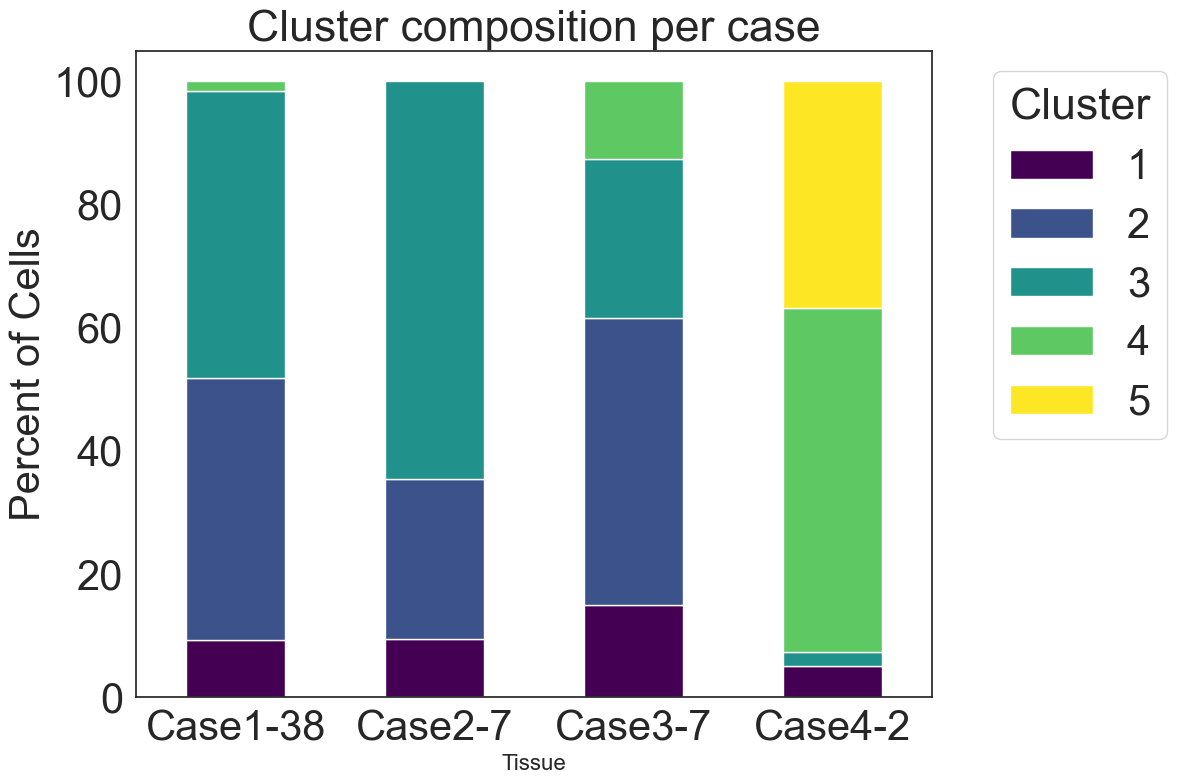

In [160]:

# Transpose so clusters are x-axis, cases are stacked bars
df_plot = percent_cluster_per_case_df.set_index('CaseID').T

# Only keep rows that start with 'percent_cluster_'
df_plot = df_plot[df_plot.index.str.startswith('percent_cluster_')]

# Clean up the index to just cluster numbers
df_plot.index = df_plot.index.str.replace('percent_cluster_', '').astype(int)
df_plot = df_plot.sort_index()

# Plot
df_plot.T.plot(
    kind='bar',
    stacked=True,
    figsize=(12,8),
    colormap='viridis',
    rot=0,
    fontsize=30   # Set font size for axis tick labels
)
plt.ylabel('Percent of Cells', fontsize=30)
plt.xlabel('Tissue', fontsize=16)
plt.title('Cluster composition per case', fontsize=32)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=30, title_fontsize=32)
plt.tight_layout()
plt.show()

In [161]:
# Compute z-score of the log_background_normalized layer (column-wise)
combined_adata_subset.layers["zscore_log_background_normalized"] = stats.zscore(
    combined_adata_subset.layers["log_background_normalized"], axis=0, nan_policy='omit'
)

In [162]:
combined_adata_subset

AnnData object with n_obs × n_vars = 418365 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI', 'MITF_positivity', 'SOX10_positivity', 'PRAME_positivity', 'AXL_positivity', 'SOX9_positivity', 'NGFR_positivity', 'cFOS_positivity', 'FRA1_positivity', 'FRA2_positivity', 'cJUN_positivity', 'JUNB_positivity', 'JUND_positivity', 'ImageID', 'phenotype_cross_cluster'
    layers: 'log', 'log1p_raw', 'tumor_zscore', 'log_background_normalized', 'zscore_log_background_normalized'

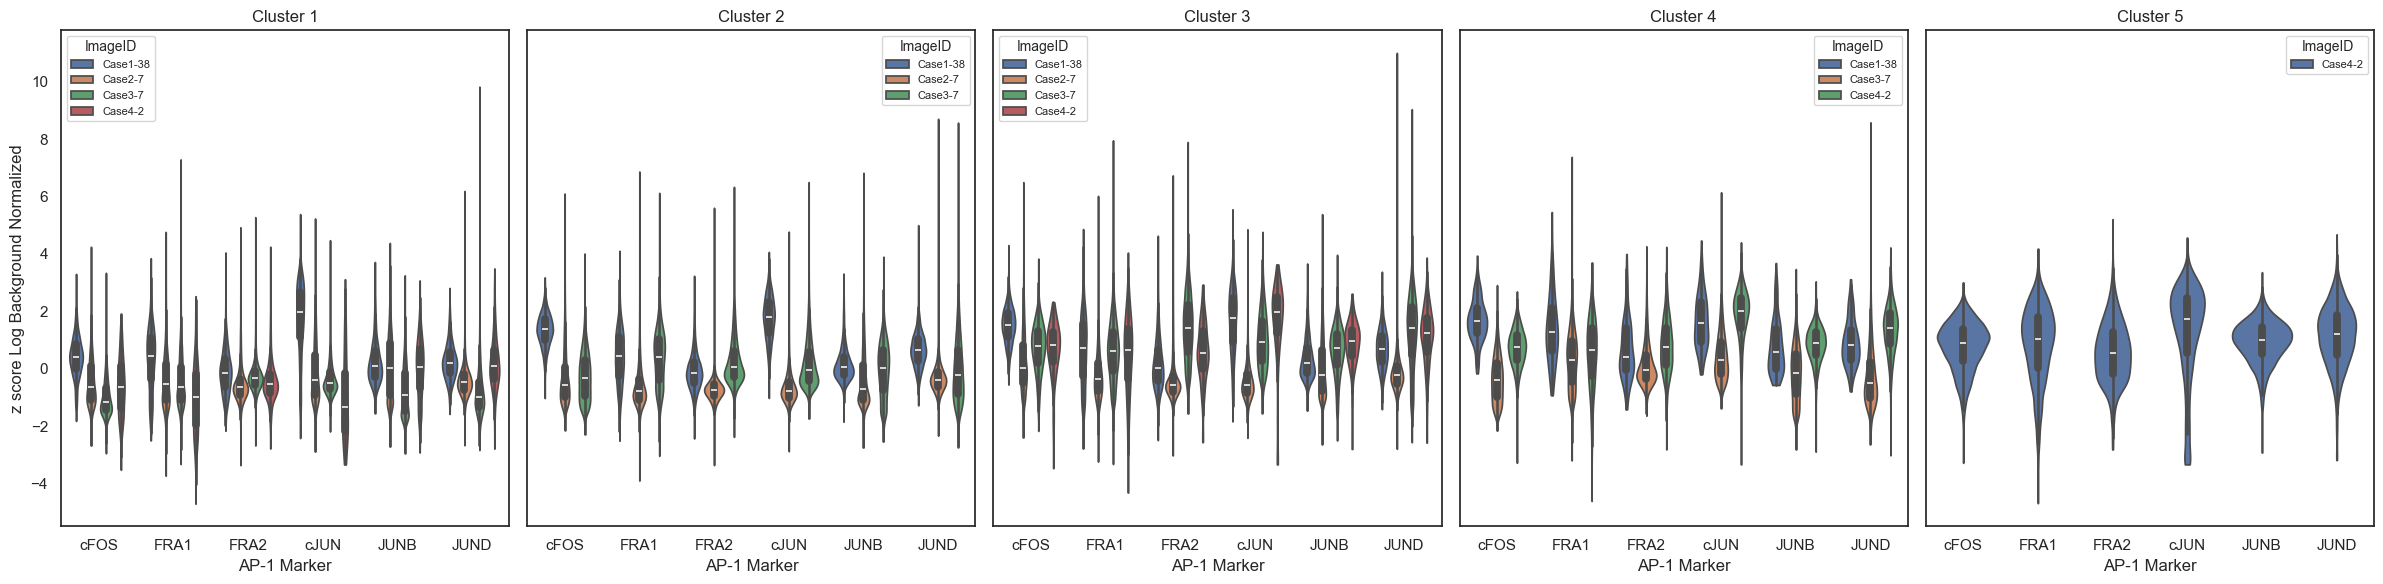

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

AP1s = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
clusters = sorted(combined_adata_subset.obs['phenotype_cross_cluster'].dropna().unique())

# Prepare a DataFrame for plotting
plot_data = []
for cluster in clusters:
    cluster_cells = combined_adata_subset.obs['phenotype_cross_cluster'] == cluster
    adata_cluster = combined_adata_subset[cluster_cells, :]
    for marker in AP1s:
        values = adata_cluster.layers['zscore_log_background_normalized'][:, adata_cluster.var_names.get_loc(marker)]
        plot_data.append(pd.DataFrame({
            'AP1': marker,
            'zscore_log_background_normalized': values.flatten(),
            'ImageID': adata_cluster.obs['ImageID'].values,
            'Cluster': cluster
        }))
plot_df = pd.concat(plot_data, ignore_index=True)

# Plot with larger figure and dodge for non-overlapping, symmetrical violins
fig, axes = plt.subplots(1, len(clusters), figsize=(24, 6), sharey=True)
for i, cluster in enumerate(clusters):
    ax = axes[i]
    sns.violinplot(
        data=plot_df[plot_df['Cluster'] == cluster],
        x='AP1',
        y='zscore_log_background_normalized',
        hue='ImageID',
        ax=ax,
        inner='box',
        cut=0,
        split=False,
        dodge=True   # Ensures violins are side-by-side and symmetrical
    )
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('AP-1 Marker')
    if i == 0:
        ax.set_ylabel('z score Log Background Normalized')
    else:
        ax.set_ylabel('')
    ax.legend(title='ImageID', fontsize=8, title_fontsize=10)
plt.tight_layout()
plt.show()

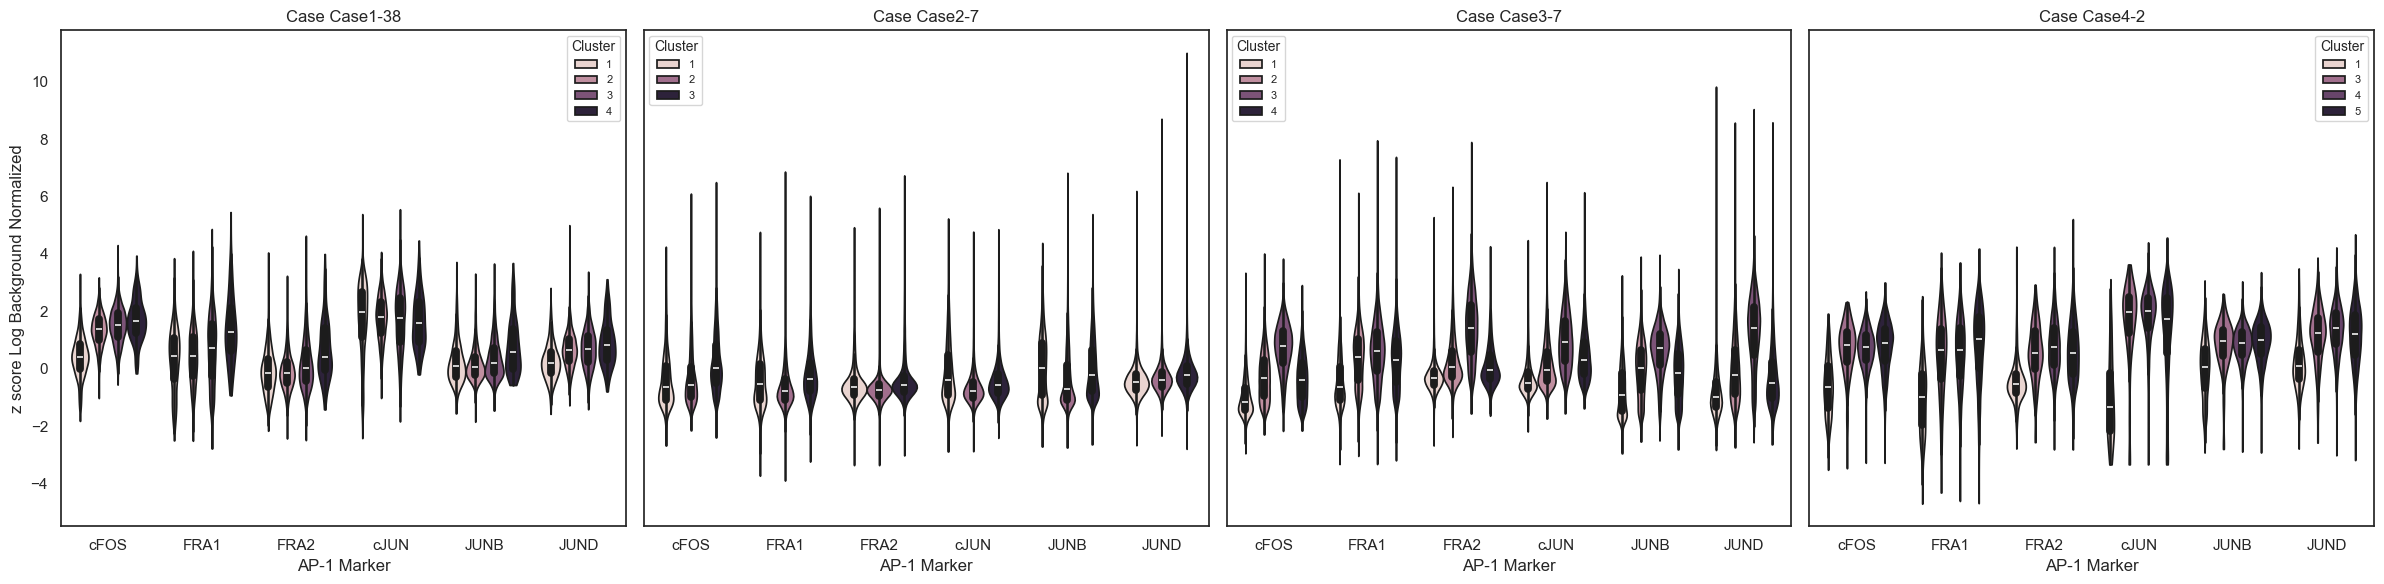

In [170]:
AP1s = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
cases = sorted(combined_adata_subset.obs['ImageID'].dropna().unique())
clusters = sorted(combined_adata_subset.obs['phenotype_cross_cluster'].dropna().unique())

# Prepare a DataFrame for plotting
plot_data = []
for case in cases:
    case_cells = combined_adata_subset.obs['ImageID'] == case
    adata_case = combined_adata_subset[case_cells, :]
    for marker in AP1s:
        values = adata_case.layers['zscore_log_background_normalized'][:, adata_case.var_names.get_loc(marker)]
        plot_data.append(pd.DataFrame({
            'AP1': marker,
            'zscore_log_background_normalized': values.flatten(),
            'Cluster': adata_case.obs['phenotype_cross_cluster'].values,
            'ImageID': case
        }))
plot_df = pd.concat(plot_data, ignore_index=True)

# Plot: one subplot per case, hue by cluster
fig, axes = plt.subplots(1, len(cases), figsize=(24, 6), sharey=True)
for i, case in enumerate(cases):
    ax = axes[i]
    sns.violinplot(
        data=plot_df[plot_df['ImageID'] == case],
        x='AP1',
        y='zscore_log_background_normalized',
        hue='Cluster',
        ax=ax,
        inner='box',
        cut=0,
        split=False,
        dodge=True
    )
    ax.set_title(f'Case {case}')
    ax.set_xlabel('AP-1 Marker')
    if i == 0:
        ax.set_ylabel('z score Log Background Normalized')
    else:
        ax.set_ylabel('')
    ax.legend(title='Cluster', fontsize=8, title_fontsize=10)
plt.tight_layout()
plt.show()

zscore

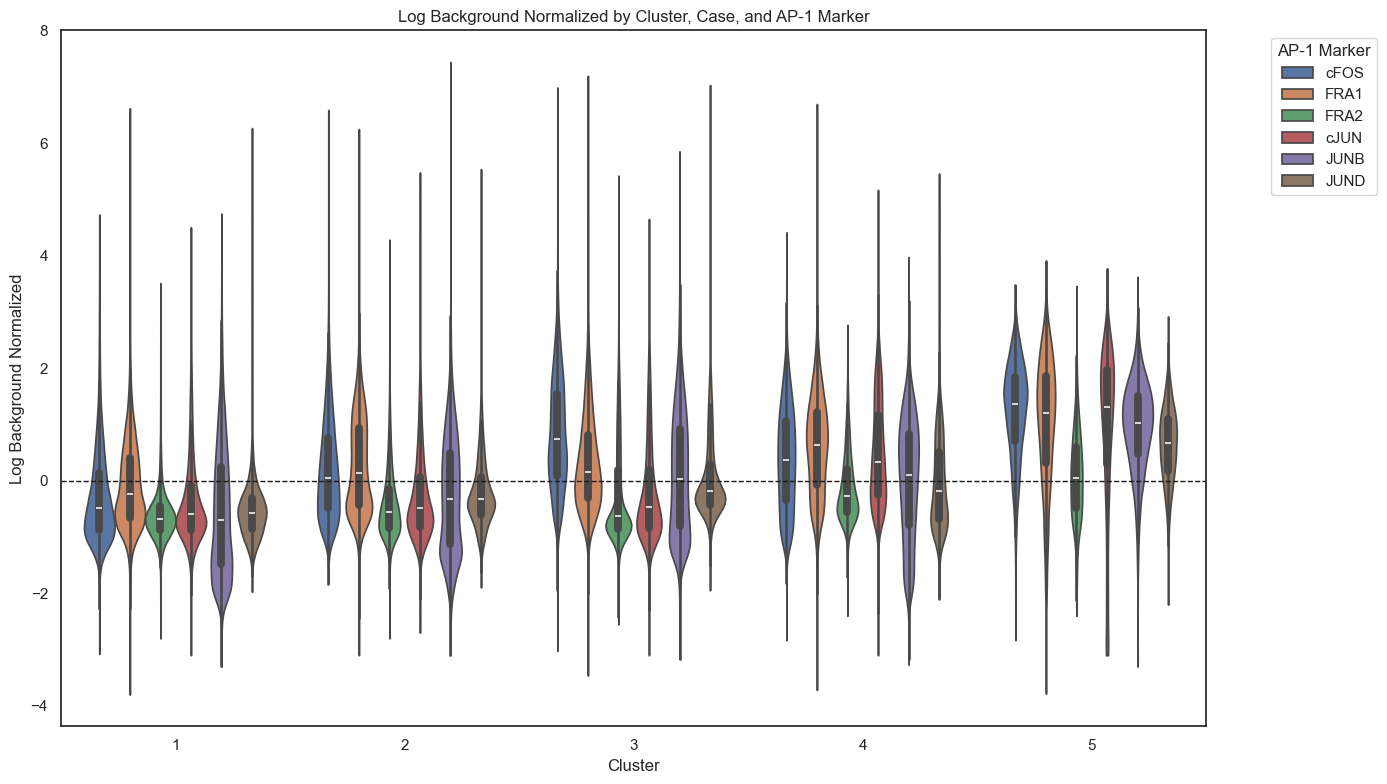

In [185]:

AP1s = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
cases = sorted(combined_adata_subset.obs['ImageID'].dropna().unique())
clusters = sorted(combined_adata_subset.obs['phenotype_cross_cluster'].dropna().unique())

# Prepare a DataFrame for plotting
plot_data = []
for case in cases:
    case_cells = combined_adata_subset.obs['ImageID'] == case
    adata_case = combined_adata_subset[case_cells, :]
    for cluster in clusters:
        cluster_cells = adata_case.obs['phenotype_cross_cluster'] == cluster
        adata_case_cluster = adata_case[cluster_cells, :]
        for marker in AP1s:
            values = adata_case_cluster.layers['log_background_normalized'][:, adata_case_cluster.var_names.get_loc(marker)]
            plot_data.append(pd.DataFrame({
                'AP1': marker,
                'log_background_normalized': values.flatten(),
                'Cluster': cluster,
                'Case': case
            }))
plot_df = pd.concat(plot_data, ignore_index=True)

# Plot: y=Case, x=Cluster, hue=AP1
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=plot_df,
    x='Cluster',
    y='log_background_normalized',
    hue='AP1',
    split=False,
    dodge=True,
    inner='box',
    cut=0
)
plt.xlabel('Cluster')
plt.ylabel('Log Background Normalized')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Log Background Normalized by Cluster, Case, and AP-1 Marker')
plt.legend(title='AP-1 Marker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

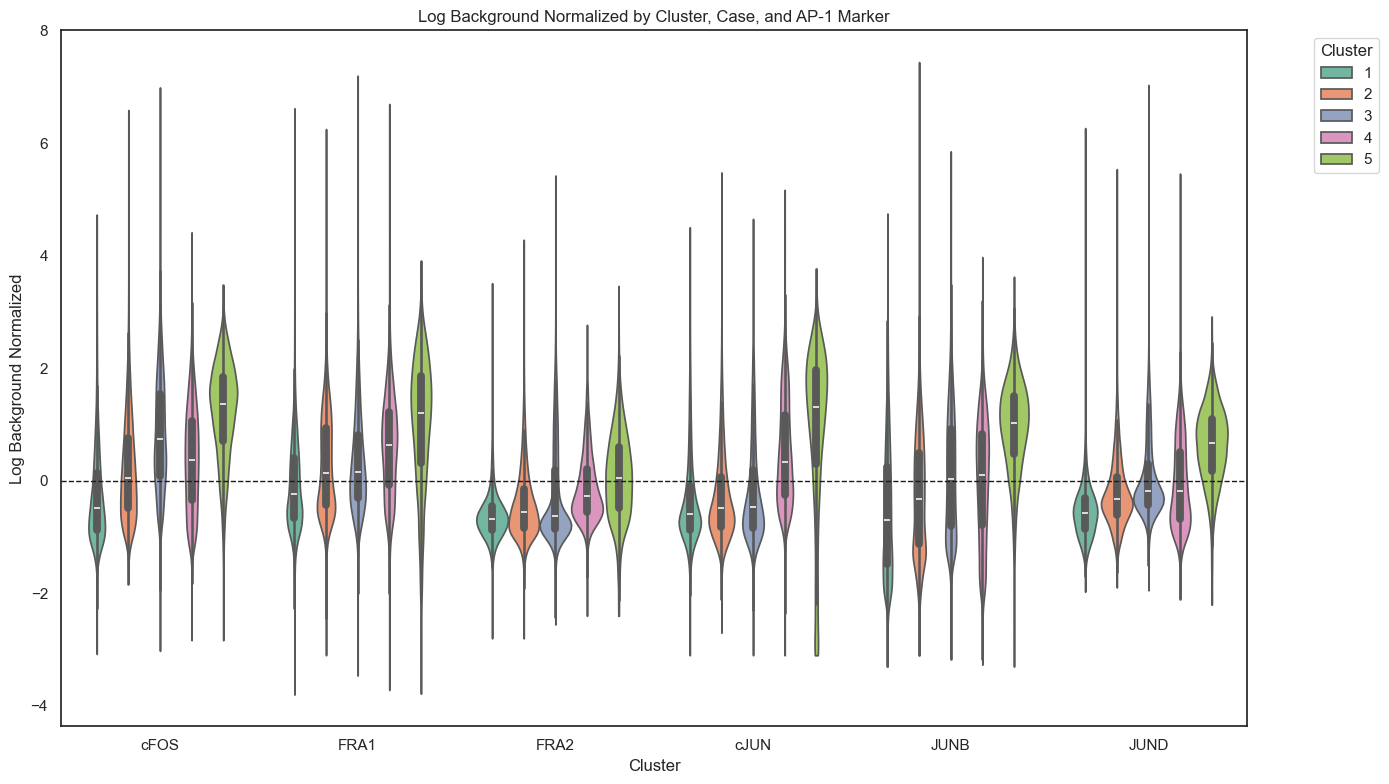

In [180]:
AP1s = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
cases = sorted(combined_adata_subset.obs['ImageID'].dropna().unique())
clusters = sorted(combined_adata_subset.obs['phenotype_cross_cluster'].dropna().unique())

# Prepare a DataFrame for plotting
plot_data = []
for case in cases:
    case_cells = combined_adata_subset.obs['ImageID'] == case
    adata_case = combined_adata_subset[case_cells, :]
    for cluster in clusters:
        cluster_cells = adata_case.obs['phenotype_cross_cluster'] == cluster
        adata_case_cluster = adata_case[cluster_cells, :]
        for marker in AP1s:
            values = adata_case_cluster.layers['log_background_normalized'][:, adata_case_cluster.var_names.get_loc(marker)]
            plot_data.append(pd.DataFrame({
                'AP1': marker,
                'log_background_normalized': values.flatten(),
                'Cluster': cluster,
                'Case': case
            }))
plot_df = pd.concat(plot_data, ignore_index=True)

# Plot: y=Case, x=Cluster, hue=AP1
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=plot_df,
    x='AP1',
    y='log_background_normalized',
    hue='Cluster',
    split=False,
    dodge=True,
    inner='box',
    cut=0,
    palette='Set2'  # Use a color palette that distinguishes clusters well
)
plt.xlabel('Cluster')
plt.ylabel('Log Background Normalized')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Log Background Normalized by Cluster, Case, and AP-1 Marker')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

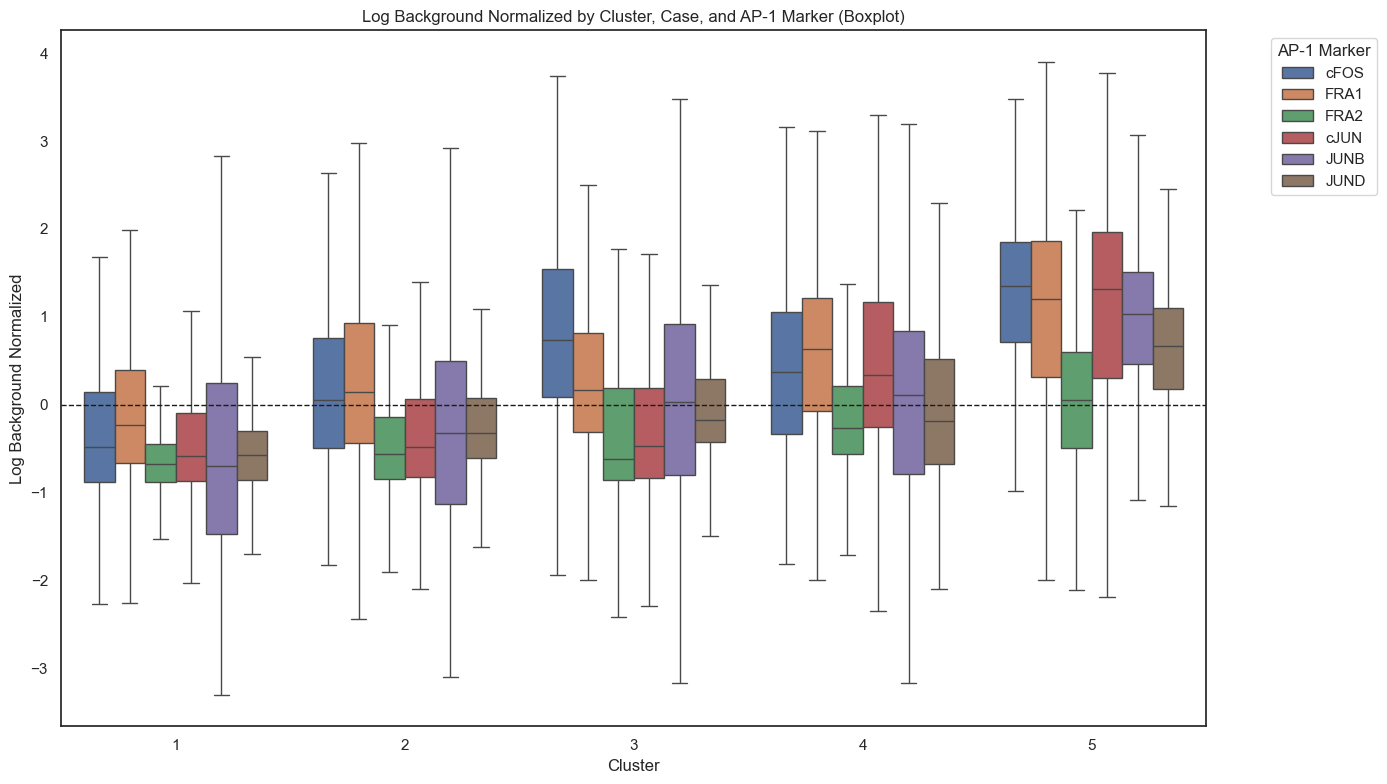

In [186]:

AP1s = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
cases = sorted(combined_adata_subset.obs['ImageID'].dropna().unique())
clusters = sorted(combined_adata_subset.obs['phenotype_cross_cluster'].dropna().unique())

# Prepare a DataFrame for plotting
plot_data = []
for case in cases:
    case_cells = combined_adata_subset.obs['ImageID'] == case
    adata_case = combined_adata_subset[case_cells, :]
    for cluster in clusters:
        cluster_cells = adata_case.obs['phenotype_cross_cluster'] == cluster
        adata_case_cluster = adata_case[cluster_cells, :]
        for marker in AP1s:
            values = adata_case_cluster.layers['log_background_normalized'][:, adata_case_cluster.var_names.get_loc(marker)]
            plot_data.append(pd.DataFrame({
                'AP1': marker,
                'log_background_normalized': values.flatten(),
                'Cluster': cluster,
                'Case': case
            }))
plot_df = pd.concat(plot_data, ignore_index=True)

# Plot: y=Case, x=Cluster, hue=AP1
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=plot_df,
    x='Cluster',
    y='log_background_normalized',
    hue='AP1',
    dodge=True,
    showfliers=False  # Hide outliers for clarity
)
plt.xlabel('Cluster')
plt.ylabel('Log Background Normalized')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Log Background Normalized by Cluster, Case, and AP-1 Marker (Boxplot)')
plt.legend(title='AP-1 Marker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [187]:
plot_df

,AP1,log_background_normalized,Cluster,Case
0,cFOS,1.174038,1,Case1-38
1,cFOS,0.722868,1,Case1-38
2,cFOS,0.917289,1,Case1-38
3,cFOS,0.546126,1,Case1-38
4,cFOS,1.770738,1,Case1-38
...,...,...,...,...
2510185,JUND,-0.827692,5,Case4-2
2510186,JUND,-1.677305,5,Case4-2
2510187,JUND,-1.341978,5,Case4-2
2510188,JUND,-2.200000,5,Case4-2


UnboundLocalError: local variable 'unique_categories_ordered' referenced before assignment

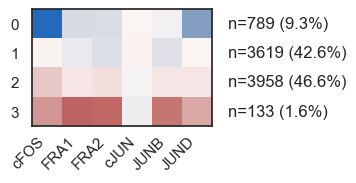

In [169]:
subsetMarkers = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']

Case_subset = combined_adata_subset[combined_adata_subset.obs['ImageID'] == 'Case1-38', :]
hm.heatmapnew(Case_subset, groupBy='phenotype_cross_cluster', layer = 'tumor_zscore' , 
          
            standardScale=None, subsetMarkers=subsetMarkers, 
            figsize=(4,2), showPrevalence=True, 
            x_tick_rotation=45,
            orderColumn=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            #orderRow= [5,4,2,1], 
            clusterRows= False, clusterColumns=False,
            scale_title ='Standardized mean z-score', y_lab='Cluster',
            phenotype_labels=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            vmin=-1, vmax=1,
            #saveDir=savedir,
            
            #fileName='Case2-7_ap1state_heatmap_cross.png'
             )

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_37959/1539493151.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




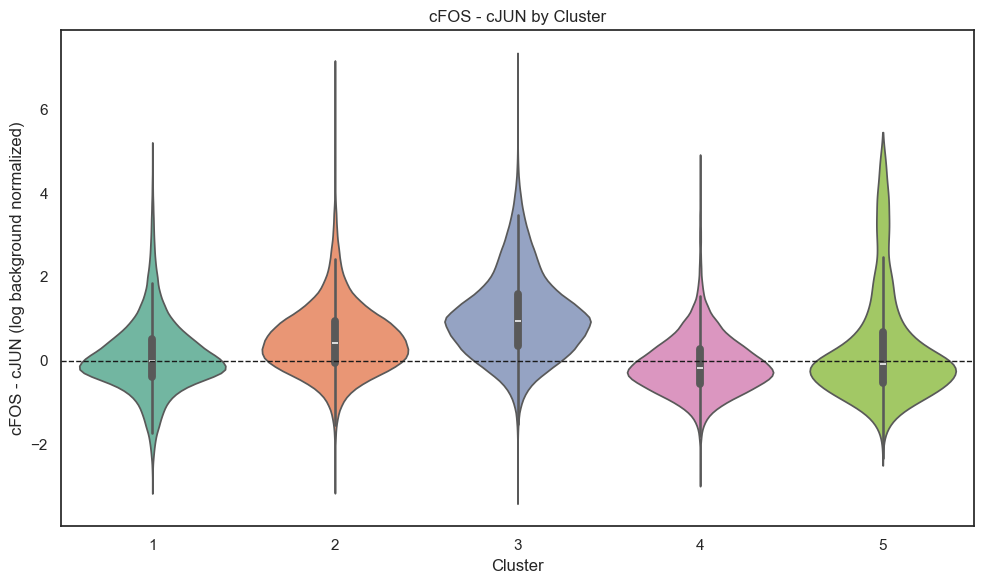

In [182]:
# Prepare a DataFrame for plotting cFOS - cJUN (log background normalized difference)
plot_data = []
for case in cases:
    case_cells = combined_adata_subset.obs['ImageID'] == case
    adata_case = combined_adata_subset[case_cells, :]
    for cluster in clusters:
        cluster_cells = adata_case.obs['phenotype_cross_cluster'] == cluster
        adata_case_cluster = adata_case[cluster_cells, :]
        # Get cFOS and cJUN values
        cFOS_vals = adata_case_cluster.layers['log_background_normalized'][:, adata_case_cluster.var_names.get_loc('cFOS')]
        cJUN_vals = adata_case_cluster.layers['log_background_normalized'][:, adata_case_cluster.var_names.get_loc('cJUN')]
        # Subtract cJUN from cFOS
        diff = cFOS_vals - cJUN_vals
        plot_data.append(pd.DataFrame({
            'cFOS_minus_cJUN': diff.flatten(),
            'Cluster': cluster,
            'Case': case
        }))
plot_df_diff = pd.concat(plot_data, ignore_index=True)

# Plot: x=Cluster, y=cFOS - cJUN
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=plot_df_diff,
    x='Cluster',
    y='cFOS_minus_cJUN',
    inner='box',
    cut=0,
    palette='Set2'
)
plt.xlabel('Cluster')
plt.ylabel('cFOS - cJUN (log background normalized)')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('cFOS - cJUN by Cluster')
plt.tight_layout()
plt.show()